In [1]:
#supress warning 
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

#change the default number of rows to be displayed
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('max_info_columns', 1000)

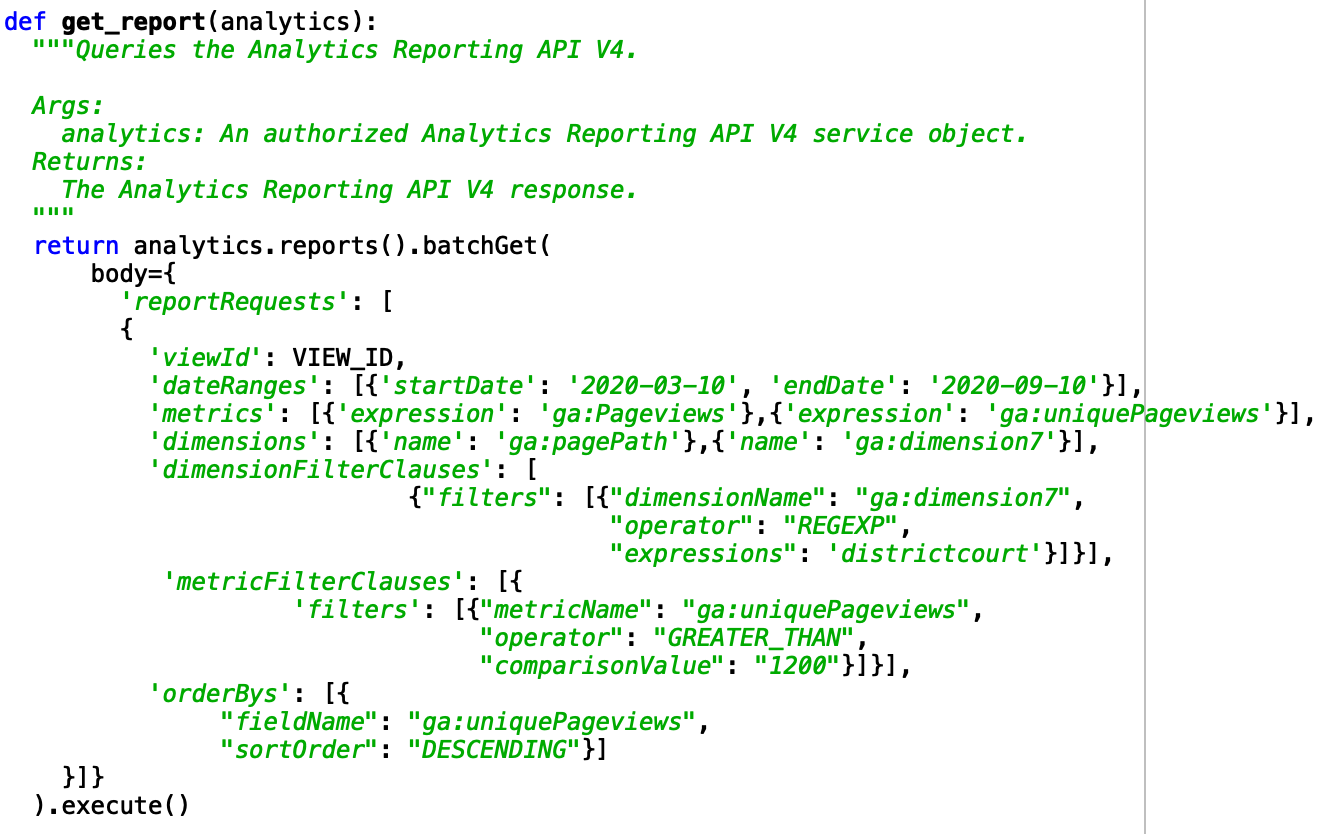

In [17]:
#new add 20201019
list1 = pd.read_excel('/Users/nancy/Desktop/MA799/pagelist2019.xlsx',sheet_name='data') #uniquepageview above 1200
list2 = pd.read_excel('/Users/nancy/Desktop/MA799/pagelist2020.xlsx',sheet_name='data') #uniquepageview above 1200
covid = pd.read_excel('/Users/nancy/Desktop/MA799/pagelist_covid.xlsx',sheet_name='data') #all covid pages

In [18]:
all_list_inner=list1.merge(list2, on = 'ga:pagePath',how='inner')['ga:pagePath'].unique()

In [19]:
all_list_right=list1.merge(list2, on = 'ga:pagePath',how='right')['ga:pagePath'].unique()

In [20]:
print(len(list1['ga:pagePath']))
print(len(list1['ga:pagePath'].unique()))   #mind!

165
148


In [21]:
list1.groupby(['ga:pagePath']).size().sort_values(ascending=False)

ga:pagePath
/info-details/your-arraignment-or-first-appearance-in-court                                            2
/guides/alphabetical-listing-of-courthouses                                                            2
/info-details/before-your-arraignment                                                                  2
/info-details/boston-municipal-court-and-district-court-filing-fees                                    2
/how-to/file-a-small-claim-in-the-boston-municipal-court-district-court-or-housing-court               2
/info-details/district-court-justices                                                                  2
/lists/restraining-order-harassment-court-forms                                                        2
/service-details/find-out-if-youre-eligible-to-file-a-small-claim                                      2
/service-details/find-out-if-youre-eligible-to-request-an-abuse-prevention-order                       2
/harassment-prevention-orders              

In [22]:
print(len(list2['ga:pagePath']))
print(len(list2['ga:pagePath'].unique()))

153
153


In [23]:
len(all_list_inner)

116

In [24]:
len(set(all_list_inner))

116

In [25]:
all_list_inner

array(['/search-court-dockets-calendars-and-case-information',
       '/how-to/how-to-search-court-dockets',
       '/how-to/pay-your-traffic-ticket', '/traffic-tickets',
       '/orgs/district-court', '/small-claims',
       '/how-to/appeal-your-traffic-ticket',
       '/lists/criminal-model-jury-instructions-for-use-in-the-district-court',
       '/locations/worcester-district-court',
       '/lists/small-claims-court-forms', '/lists/district-court-forms',
       '/service-details/small-claims-court',
       '/lists/restraining-order-harassment-court-forms',
       '/locations/springfield-district-court', '/eviction-for-landlords',
       '/locations/quincy-district-court',
       '/locations/plymouth-district-court',
       '/how-to/view-electronic-case-information-through-the-attorney-portal',
       '/info-details/the-pre-trial-trial-and-verdict-process',
       '/how-to/request-a-harassment-prevention-order',
       '/locations/brockton-district-court',
       '/info-details/type

In [26]:
len(all_list_right)  #36 new pages launch or orginally below 1200

153

In [27]:
all_list_inner = list(all_list_inner) + list(covid['ga:pagePath'])

In [28]:
len(all_list_inner)

119

In [29]:
additional_links = [i for i in all_list_right if i not in all_list_inner]

In [30]:
#split into different services
traffic2 = list()
small_claims2 = list()
abuse_harassment2 = list()
locations2 = list()
eviction2 = list()
mental2 = list()
covid2 = list()
criminal2 = list()

for i in all_list_inner:
    if ('traffic' in i) or ('ticket' in i):
        traffic2.append(i)
    elif 'small-claim' in i:
        small_claims2.append(i)
    elif ('abuse' in i) or ('harassment' in i) or ('protection' in i):
        abuse_harassment2.append(i)
    elif ('location' in i) or ('courts-serving' in i):
        locations2.append(i)
    elif 'eviction' in i:
        eviction2.append(i)
    elif ('mental-health' in i) or ('drug' in i) or ('specialty-courts' in i):
        mental2.append(i)
    elif 'covid' in i:
        covid2.append(i)
    elif ('criminal' in i) or ('bail' in i):
        criminal2.append(i)

In [31]:
traffic2
#4

['/how-to/pay-your-traffic-ticket',
 '/traffic-tickets',
 '/how-to/appeal-your-traffic-ticket',
 '/non-criminal-tickets']

In [32]:
small_claims2
#9

['/small-claims',
 '/lists/small-claims-court-forms',
 '/service-details/small-claims-court',
 '/how-to/file-a-small-claim-in-the-boston-municipal-court-district-court-or-housing-court',
 '/service-details/find-out-if-youre-eligible-to-file-a-small-claim',
 '/service-details/what-to-do-if-you-lose-your-small-claims-case',
 '/service-details/what-to-do-if-you-win-your-small-claims-case',
 '/service-details/learn-what-to-expect-at-a-small-claims-trial',
 '/service-details/small-claims-for-defendants']

In [33]:
abuse_harassment2
#12

['/lists/restraining-order-harassment-court-forms',
 '/how-to/request-a-harassment-prevention-order',
 '/harassment-prevention-orders',
 '/service-details/find-out-what-qualifies-as-harassment',
 '/info-details/find-out-how-harassment-prevention-orders-work',
 '/service-details/find-out-what-happens-if-the-defendant-violates-an-abuse-prevention-order',
 '/topics/abuse-harassment-court-orders',
 '/service-details/find-out-if-youre-eligible-to-request-an-abuse-prevention-order',
 '/abuse-prevention-orders-for-plaintiffs',
 '/how-to/request-an-abuse-prevention-order',
 '/extreme-risk-protection-orders',
 '/service-details/find-out-what-happens-if-the-defendant-violates-a-harassment-prevention-order',
 '/abuse-prevention-orders-for-defendants']

In [34]:
locations2


['/locations/worcester-district-court',
 '/locations/springfield-district-court',
 '/locations/quincy-district-court',
 '/locations/plymouth-district-court',
 '/locations/brockton-district-court',
 '/locations/salem-district-court',
 '/locations/lawrence-district-court',
 '/locations/lowell-district-court',
 '/locations/woburn-district-court',
 '/locations/cambridge-district-court',
 '/locations/taunton-district-court',
 '/locations/lynn-district-court',
 '/locations/new-bedford-district-court',
 '/locations/malden-district-court',
 '/locations/hingham-district-court',
 '/locations/barnstable-district-court',
 '/locations/waltham-district-court',
 '/locations/somerville-district-court',
 '/locations/newburyport-district-court',
 '/locations/fall-river-district-court',
 '/locations/chelsea-district-court',
 '/locations/peabody-district-court',
 '/locations/dedham-district-court',
 '/locations/newton-district-court',
 '/locations/framingham-district-court',
 '/locations/east-brookfield-d

In [35]:
eviction2
#3

['/eviction-for-landlords',
 '/how-to/file-an-eviction-case',
 '/lists/court-forms-for-eviction']

In [36]:
mental2
#3

['/lists/mental-health-court-forms',
 '/specialty-courts',
 '/info-details/drug-courts']

In [37]:
covid2

['/guides/district-court-faqs-related-to-covid-19',
 '/info-details/district-court-faqs-related-to-covid-19',
 '/guides/preguntas-frecuentes-covid-19-tribunal-de-distrito']

In [38]:
criminal2
#6

['/lists/criminal-model-jury-instructions-for-use-in-the-district-court',
 '/understanding-the-criminal-court-process',
 '/bail',
 '/lists/court-forms-for-criminal-records',
 '/how-to/request-a-non-time-based-expungement-of-your-criminal-record',
 '/expunge-your-criminal-record']

In [39]:
group2 = traffic2 + small_claims2 + abuse_harassment2 + locations2 + eviction2 + mental2 + covid2 + criminal2


In [40]:
len(group2)

95

In [41]:
ungroup2 = [p for p in all_list_inner if p not in group2]

In [42]:
ungroup2

['/search-court-dockets-calendars-and-case-information',
 '/how-to/how-to-search-court-dockets',
 '/orgs/district-court',
 '/lists/district-court-forms',
 '/how-to/view-electronic-case-information-through-the-attorney-portal',
 '/info-details/the-pre-trial-trial-and-verdict-process',
 '/info-details/types-of-cases-available-to-the-public-online',
 '/info-details/your-arraignment-or-first-appearance-in-court',
 '/info-details/what-to-expect-at-your-arraignment-or-first-court-appearance',
 '/info-details/types-of-cases-available-through-the-attorney-portal-for-case-information',
 '/info-details/trial-court-codes-numerical-listing',
 '/lists/court-forms-for-civil-matters',
 '/guides/massachusetts-rules-of-court-and-standing-orders',
 '/how-to/file-for-guardianship-of-a-minor',
 '/info-details/district-court-justices',
 '/service-details/lawyer-for-the-day-programs',
 '/guides/alphabetical-listing-of-courthouses',
 '/districtmunicipal-court-rules/joint-standing-order-1-04-civil-case-manage

In [43]:
len(ungroup2)

24

In [44]:
#group remained links to group "other" 
other2=ungroup2

In [ ]:
#example 
def get_report(analytics):
  """Queries the Analytics Reporting API V4.

  Args:
    analytics: An authorized Analytics Reporting API V4 service object.
  Returns:
    The Analytics Reporting API V4 response.
  """
  return analytics.reports().batchGet(
      body={
        'reportRequests': [
        { #'includeEmptyRows': 'true',
          'viewId': VIEW_ID,
          'dateRanges': [{'startDate': '2019-03-10', 'endDate': '2019-09-10'}],
          'metrics': [{'expression': 'ga:uniquePageviews'},{'expression': 'ga:sessions'},
                      {'expression': 'ga:avgTimeOnPage'}],
          'dimensions': [{'name': 'ga:pagePath'},{'name': 'ga:date'},{'name': 'ga:userGender'},
                         {'name': 'ga:userAgeBracket'},{'name': 'ga:deviceCategory'}],
          'dimensionFilterClauses': [
                            {"filters": [{"dimensionName": "ga:pagePath",
                                          "operator": "IN_LIST",
                                          "expressions": traffic2}]}],
          'orderBys': [{
               "fieldName": "ga:",
               "sortOrder": "ASCENDING"}],
            "includeEmptyRows": "true"
            
    }]}
  ).execute()


In [45]:
#save into different files (by services)

"""Hello Analytics Reporting API V4."""

from apiclient.discovery import build
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd


SCOPES = ['https://www.googleapis.com/auth/analytics.readonly']
KEY_FILE_LOCATION = '/Users/nancy/Desktop/MA799/spring-monolith-290419-6623c11f5199.json'
VIEW_ID = '140110673'


def initialize_analyticsreporting():
  """Initializes an Analytics Reporting API V4 service object.

  Returns:
    An authorized Analytics Reporting API V4 service object.
  """
  credentials = ServiceAccountCredentials.from_json_keyfile_name(
      KEY_FILE_LOCATION, SCOPES)

  # Build the service object.
  analytics = build('analyticsreporting', 'v4', credentials=credentials)

  return analytics


def get_report(analytics,service):
  """Queries the Analytics Reporting API V4.

  Args:
    analytics: An authorized Analytics Reporting API V4 service object.
  Returns:
    The Analytics Reporting API V4 response.
  """
  return analytics.reports().batchGet(
      body={
        'reportRequests': [
        { #'includeEmptyRows': 'true',
          'viewId': VIEW_ID,
          'dateRanges': [{'startDate': '2020-03-10', 'endDate': '2020-09-10'}],
          'metrics': [{'expression': 'ga:avgTimeOnPage'}],
          'dimensions': [{'name': 'ga:userGender'}#,
                        #{'name': 'ga:deviceCategory'}#,
                         #{'name': 'ga:userAgeBracket'}
                        ],
          'dimensionFilterClauses': [
                            {"filters": [{"dimensionName": "ga:pagePath",
                                          "operator": "IN_LIST",
                                          "expressions": service}]}],
            #'orderBys': [{
            #   "fieldName": "ga:deviceCategory",
            #   "sortOrder": "ASCENDING"},
            "pageSize": 10000,
            
    }]}
  ).execute()


def print_response(response):
  """Parses and prints the Analytics Reporting API V4 response.

  Args:
    response: An Analytics Reporting API V4 response.
  """
  for report in response.get('reports', []):
    columnHeader = report.get('columnHeader', {})
    dimensionHeaders = columnHeader.get('dimensions', [])
    metricHeaders = columnHeader.get('metricHeader', {}).get('metricHeaderEntries', [])

    for row in report.get('data', {}).get('rows', []):
      dimensions = row.get('dimensions', [])
      dateRangeValues = row.get('metrics', [])

      for header, dimension in zip(dimensionHeaders, dimensions):
        print(header + ': ', dimension)

      for i, values in enumerate(dateRangeValues):
        print('Date range:', str(i))
        for metricHeader, value in zip(metricHeaders, values.get('values')):
          print(metricHeader.get('name') + ':', value)
          
          
#new add
def response_df(response):
  list = []
  # get report data
  for report in response.get('reports', []):
    # set column headers
    columnHeader = report.get('columnHeader', {})
    dimensionHeaders = columnHeader.get('dimensions', [])
    metricHeaders = columnHeader.get('metricHeader', {}).get('metricHeaderEntries', [])
    rows = report.get('data', {}).get('rows', [])
    
    for row in rows:
        # create dict for each row
        dict = {}
        dimensions = row.get('dimensions', [])
        dateRangeValues = row.get('metrics', [])

        # fill dict with dimension header (key) and dimension value (value)
        for header, dimension in zip(dimensionHeaders, dimensions):
          dict[header] = dimension

        # fill dict with metric header (key) and metric value (value)
        for i, values in enumerate(dateRangeValues):
          for metric, value in zip(metricHeaders, values.get('values')):
            #set int as int, float a float
            if ',' in value or '.' in value:
              dict[metric.get('name')] = float(value)
            else:
              dict[metric.get('name')] = int(value)

        list.append(dict)
    
    df = pd.DataFrame(list)
    return df


def save_df_to_excel(df, path, file_name, sheet_name):
  writer = pd.ExcelWriter(path+file_name+'.xlsx', engine='xlsxwriter')
  df.to_excel(writer, sheet_name=sheet_name)
  writer.save()       
###          
    

   
def main():
  analytics = initialize_analyticsreporting()
  i = 1
  for s in [traffic2,small_claims2,abuse_harassment2,locations2,eviction2,mental2,criminal2,other2]:
        response = get_report(analytics,s)
        df = response_df(response)
        print(df)
        save_df_to_excel(df=df,path='/Users/nancy/Desktop/MA799/',file_name='sub2019'+str(i),sheet_name='data')
        i += 1
        
        
        
if __name__ == '__main__':
  main()

  ga:userGender  ga:avgTimeOnPage
0        female         86.491856
1          male        160.174766
  ga:userGender  ga:avgTimeOnPage
0        female        118.908210
1          male        195.004722
  ga:userGender  ga:avgTimeOnPage
0        female         71.779402
1          male         67.888349
  ga:userGender  ga:avgTimeOnPage
0        female        139.500796
1          male        114.872373
  ga:userGender  ga:avgTimeOnPage
0        female         81.225847
1          male         65.496516
Empty DataFrame
Columns: []
Index: []
  ga:userGender  ga:avgTimeOnPage
0        female        192.284379
1          male        141.770035
  ga:userGender  ga:avgTimeOnPage
0        female        154.627279
1          male        119.650684


In [339]:
#create all info dataset
"""Hello Analytics Reporting API V4."""

from apiclient.discovery import build
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd


SCOPES = ['https://www.googleapis.com/auth/analytics.readonly']
KEY_FILE_LOCATION = '/Users/nancy/Desktop/MA799/spring-monolith-290419-6623c11f5199.json'
VIEW_ID = '140110673'


def initialize_analyticsreporting():
  """Initializes an Analytics Reporting API V4 service object.

  Returns:
    An authorized Analytics Reporting API V4 service object.
  """
  credentials = ServiceAccountCredentials.from_json_keyfile_name(
      KEY_FILE_LOCATION, SCOPES)

  # Build the service object.
  analytics = build('analyticsreporting', 'v4', credentials=credentials)

  return analytics


def get_report(analytics):
  """Queries the Analytics Reporting API V4.

  Args:
    analytics: An authorized Analytics Reporting API V4 service object.
  Returns:
    The Analytics Reporting API V4 response.
  """
  return analytics.reports().batchGet(
      body={
        'reportRequests': [
        {
          'viewId': VIEW_ID,
          'dateRanges': [{'startDate': '2019-09-10', 'endDate': '2020-09-10'}],
          'metrics': [{'expression': 'ga:uniquePageviews'}
                     ],
          'dimensions': [{'name': 'ga:pagePath'},{'name': 'ga:date'}],
          'dimensionFilterClauses': [
                            {"filters": [{"dimensionName": "ga:pagePath",
                                          "operator": "IN_LIST",
                                          "expressions": all_list_inner}]}],
          "pageSize": 100000

    }]}
  ).execute()


def print_response(response):
  """Parses and prints the Analytics Reporting API V4 response.

  Args:
    response: An Analytics Reporting API V4 response.
  """
  for report in response.get('reports', []):
    columnHeader = report.get('columnHeader', {})
    dimensionHeaders = columnHeader.get('dimensions', [])
    metricHeaders = columnHeader.get('metricHeader', {}).get('metricHeaderEntries', [])

    for row in report.get('data', {}).get('rows', []):
      dimensions = row.get('dimensions', [])
      dateRangeValues = row.get('metrics', [])

      for header, dimension in zip(dimensionHeaders, dimensions):
        print(header + ': ', dimension)

      for i, values in enumerate(dateRangeValues):
        print('Date range:', str(i))
        for metricHeader, value in zip(metricHeaders, values.get('values')):
          print(metricHeader.get('name') + ':', value)
          
          
#new add
def response_df(response):
  list = []
  # get report data
  for report in response.get('reports', []):
    # set column headers
    columnHeader = report.get('columnHeader', {})
    dimensionHeaders = columnHeader.get('dimensions', [])
    metricHeaders = columnHeader.get('metricHeader', {}).get('metricHeaderEntries', [])
    rows = report.get('data', {}).get('rows', [])
    
    for row in rows:
        # create dict for each row
        dict = {}
        dimensions = row.get('dimensions', [])
        dateRangeValues = row.get('metrics', [])

        # fill dict with dimension header (key) and dimension value (value)
        for header, dimension in zip(dimensionHeaders, dimensions):
          dict[header] = dimension

        # fill dict with metric header (key) and metric value (value)
        for i, values in enumerate(dateRangeValues):
          for metric, value in zip(metricHeaders, values.get('values')):
            #set int as int, float a float
            if ',' in value or '.' in value:
              dict[metric.get('name')] = float(value)
            else:
              dict[metric.get('name')] = int(value)

        list.append(dict)
    
    df = pd.DataFrame(list)
    return df   


def save_df_to_excel(df, path, file_name, sheet_name):
  writer = pd.ExcelWriter(path+file_name+'.xlsx', engine='xlsxwriter')
  df.to_excel(writer, sheet_name=sheet_name)
  writer.save()       
###          
    
          
          
def main():
  analytics = initialize_analyticsreporting()
  response = get_report(analytics)
  df = response_df(response)
  print(df)
  #save_df_to_excel(
  #df=df,
  #path='/Users/nancy/Desktop/MA799/',
  #file_name='data_ts',
  #sheet_name='data')

if __name__ == '__main__':
  main()


                                     ga:pagePath   ga:date  ga:uniquePageviews
0        /abuse-prevention-orders-for-defendants  20190910                  16
1        /abuse-prevention-orders-for-defendants  20190911                  15
2        /abuse-prevention-orders-for-defendants  20190912                   6
3        /abuse-prevention-orders-for-defendants  20190913                   4
4        /abuse-prevention-orders-for-defendants  20190914                   4
...                                          ...       ...                 ...
42553  /understanding-the-criminal-court-process  20200906                   4
42554  /understanding-the-criminal-court-process  20200907                   3
42555  /understanding-the-criminal-court-process  20200908                  13
42556  /understanding-the-criminal-court-process  20200909                   8
42557  /understanding-the-criminal-court-process  20200910                  12

[42558 rows x 3 columns]


when we grab daily device data, the row are only 6000. Missed 70% of data.  Cannot grab age and gender daily data.

In [61]:
ts = pd.read_excel('/Users/nancy/Desktop/MA799/pagelist_ts.xlsx',sheet_name='data')

In [64]:
ts_list=list(ts['ga:pagePath'])

In [ ]:
#compare to GA data OK!
#mind duplicated links. GA API already add them up GREAT!
#add category columns

In [113]:
all2019 = pd.read_excel('/Users/nancy/Desktop/MA799/all2019.xlsx',sheet_name='data')
all2020 = pd.read_excel('/Users/nancy/Desktop/MA799/all2020.xlsx',sheet_name='data')

In [71]:
data_ts = pd.read_excel('/Users/nancy/Desktop/MA799/data_ts.xlsx',sheet_name='data')

In [120]:
all2019.groupby(['ga:pagePath','ga:date']).size().sort_values(ascending=False)

ga:pagePath                                ga:date   
/understanding-the-criminal-court-process  2019-09-10    1
/lists/mental-health-court-forms           2019-07-14    1
                                           2019-07-16    1
                                           2019-07-17    1
                                           2019-07-18    1
                                                        ..
/locations/palmer-district-court           2019-05-24    1
                                           2019-05-25    1
                                           2019-05-26    1
                                           2019-05-27    1
/abuse-prevention-orders-for-defendants    2019-03-10    1
Length: 21405, dtype: int64

In [114]:
all2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21479 entries, 0 to 21478
Data columns (total 9 columns):
ga:pagePath           21479 non-null object
ga:date               21479 non-null int64
ga:sessions           21479 non-null int64
ga:uniquePageviews    21479 non-null int64
ga:bounceRate         21479 non-null float64
ga:avgTimeOnPage      21479 non-null float64
ga:exitRate           21479 non-null float64
ga:newUsers           21479 non-null int64
ga:organicSearches    21479 non-null int64
dtypes: float64(3), int64(5), object(1)
memory usage: 1.5+ MB


In [72]:
data_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42558 entries, 0 to 42557
Data columns (total 4 columns):
Unnamed: 0            42558 non-null int64
ga:pagePath           42558 non-null object
ga:date               42558 non-null int64
ga:uniquePageviews    42558 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.3+ MB


In [122]:
all2020.head()

,ga:pagePath,ga:date,ga:sessions,ga:uniquePageviews,ga:bounceRate,ga:avgTimeOnPage,ga:exitRate,ga:newUsers,ga:organicSearches
0,/abuse-prevention-orders-for-defendants,2020-03-10,4,10,25.000000,23.5,14.285714,1,3
1,/abuse-prevention-orders-for-defendants,2020-03-11,6,13,50.000000,233.4,37.500000,2,3
2,/abuse-prevention-orders-for-defendants,2020-03-12,6,9,33.333333,21.9,23.076923,4,4
3,/abuse-prevention-orders-for-defendants,2020-03-13,10,13,40.000000,128.5,33.333333,5,7
4,/abuse-prevention-orders-for-defendants,2020-03-14,1,4,100.000000,394.4,16.666667,0,1


In [118]:
from datetime import datetime
all2019['ga:date'] = [datetime.strptime(str(i), '%Y%m%d') for i in all2019['ga:date']]

In [121]:
all2020['ga:date'] = [datetime.strptime(str(i), '%Y%m%d') for i in all2020['ga:date']]

In [99]:
from datetime import datetime
data_ts['ga:date'] = [datetime.strptime(str(i), '%Y%m%d') for i in data_ts['ga:date']]

In [126]:
conditions = [
    (all2019['ga:pagePath'].isin(traffic2)),
    (all2019['ga:pagePath'].isin(small_claims2)),
    (all2019['ga:pagePath'].isin(abuse_harassment2)),
    (all2019['ga:pagePath'].isin(locations2)),
    (all2019['ga:pagePath'].isin(eviction2)),
    (all2019['ga:pagePath'].isin(mental2)),
    (all2019['ga:pagePath'].isin(covid2)),
    (all2019['ga:pagePath'].isin(criminal2)),
    (all2019['ga:pagePath'].isin(other2))]

values = ['traffic',
'small_claims',
'abuse_harassment',
'locations',
'eviction',
'mental',
'covid',
'criminal',
'other']

all2019['service'] = np.select(conditions, values)



In [96]:
conditions = [
    (data_ts['ga:pagePath'].isin(traffic2)),
    (data_ts['ga:pagePath'].isin(small_claims2)),
    (data_ts['ga:pagePath'].isin(abuse_harassment2)),
    (data_ts['ga:pagePath'].isin(locations2)),
    (data_ts['ga:pagePath'].isin(eviction2)),
    (data_ts['ga:pagePath'].isin(mental2)),
    (data_ts['ga:pagePath'].isin(covid2)),
    (data_ts['ga:pagePath'].isin(criminal2)),
    (data_ts['ga:pagePath'].isin(other2))]

values = ['traffic',
'small_claims',
'abuse_harassment',
'locations',
'eviction',
'mental',
'covid',
'criminal',
'other']

data_ts['service'] = np.select(conditions, values)

In [100]:
data_ts.head()

,Unnamed: 0,ga:pagePath,ga:date,ga:uniquePageviews,service
0,0,/abuse-prevention-orders-for-defendants,2019-09-10,16,abuse_harassment
1,1,/abuse-prevention-orders-for-defendants,2019-09-11,15,abuse_harassment
2,2,/abuse-prevention-orders-for-defendants,2019-09-12,6,abuse_harassment
3,3,/abuse-prevention-orders-for-defendants,2019-09-13,4,abuse_harassment
4,4,/abuse-prevention-orders-for-defendants,2019-09-14,4,abuse_harassment


In [127]:
all2019.head()

,ga:pagePath,ga:date,ga:sessions,ga:uniquePageviews,ga:bounceRate,ga:avgTimeOnPage,ga:exitRate,ga:newUsers,ga:organicSearches,service
0,/abuse-prevention-orders-for-defendants,2019-03-10,4,11,50.000000,31.000000,40.000000,2,2,abuse_harassment
1,/abuse-prevention-orders-for-defendants,2019-03-11,6,13,66.666667,12.777778,40.000000,3,3,abuse_harassment
2,/abuse-prevention-orders-for-defendants,2019-03-12,7,17,57.142857,65.181818,38.888889,2,2,abuse_harassment
3,/abuse-prevention-orders-for-defendants,2019-03-13,9,16,11.111111,33.150000,4.761905,3,4,abuse_harassment
4,/abuse-prevention-orders-for-defendants,2019-03-14,3,12,100.000000,102.500000,23.076923,2,2,abuse_harassment


In [128]:
conditions = [
    (all2020['ga:pagePath'].isin(traffic2)),
    (all2020['ga:pagePath'].isin(small_claims2)),
    (all2020['ga:pagePath'].isin(abuse_harassment2)),
    (all2020['ga:pagePath'].isin(locations2)),
    (all2020['ga:pagePath'].isin(eviction2)),
    (all2020['ga:pagePath'].isin(mental2)),
    (all2020['ga:pagePath'].isin(covid2)),
    (all2020['ga:pagePath'].isin(criminal2)),
    (all2020['ga:pagePath'].isin(other2))]

values = ['traffic',
'small_claims',
'abuse_harassment',
'locations',
'eviction',
'mental',
'covid',
'criminal',
'other']

all2020['service'] = np.select(conditions, values)


In [129]:
all2020.head()

,ga:pagePath,ga:date,ga:sessions,ga:uniquePageviews,ga:bounceRate,ga:avgTimeOnPage,ga:exitRate,ga:newUsers,ga:organicSearches,service
0,/abuse-prevention-orders-for-defendants,2020-03-10,4,10,25.000000,23.5,14.285714,1,3,abuse_harassment
1,/abuse-prevention-orders-for-defendants,2020-03-11,6,13,50.000000,233.4,37.500000,2,3,abuse_harassment
2,/abuse-prevention-orders-for-defendants,2020-03-12,6,9,33.333333,21.9,23.076923,4,4,abuse_harassment
3,/abuse-prevention-orders-for-defendants,2020-03-13,10,13,40.000000,128.5,33.333333,5,7,abuse_harassment
4,/abuse-prevention-orders-for-defendants,2020-03-14,1,4,100.000000,394.4,16.666667,0,1,abuse_harassment


In [130]:
save_df_to_excel(
  df=all2019,
  path='/Users/nancy/Desktop/MA799/',
  file_name='cleandata_2019',
  sheet_name='data')

In [131]:
save_df_to_excel(
  df=all2020,
  path='/Users/nancy/Desktop/MA799/',
  file_name='cleandata_2020',
  sheet_name='data')

In [101]:
save_df_to_excel(
  df=data_ts,
  path='/Users/nancy/Desktop/MA799/',
  file_name='cleandata_ts',
  sheet_name='data')

# EDA

In [2]:
df1 = pd.read_excel('/Users/nancy/Desktop/MA799/20201.xlsx',sheet_name='data')
df2 = pd.read_excel('/Users/nancy/Desktop/MA799/20202.xlsx',sheet_name='data')
df3 = pd.read_excel('/Users/nancy/Desktop/MA799/20203.xlsx',sheet_name='data')
df4 = pd.read_excel('/Users/nancy/Desktop/MA799/20204.xlsx',sheet_name='data')
df5 = pd.read_excel('/Users/nancy/Desktop/MA799/20205.xlsx',sheet_name='data')
df6 = pd.read_excel('/Users/nancy/Desktop/MA799/20206.xlsx',sheet_name='data')
df7 = pd.read_excel('/Users/nancy/Desktop/MA799/20207.xlsx',sheet_name='data')

In [3]:
data={'service':['traffic','small_claims','abuse_harassment',
                              'eviction','mental','criminal'],
                 'unique_pageviews':[df1['ga:uniquePageviews'].sum(),
                                     df2['ga:uniquePageviews'].sum(),
                                     df3['ga:uniquePageviews'].sum(),
                                     df5['ga:uniquePageviews'].sum(),
                                     df6['ga:uniquePageviews'].sum(),
                                     df7['ga:uniquePageviews'].sum()]}
pg = pd.DataFrame (data, columns = ['service','unique_pageviews'])


Text(0.5, 1.0, 'Service Comparison')

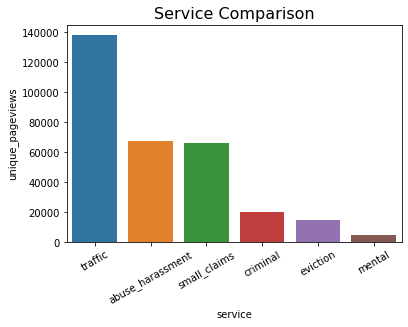

In [4]:
sns.barplot(x='service', y='unique_pageviews',
            data=pg, order=pg.sort_values(by='unique_pageviews',ascending=False).service)
plt.xticks(rotation=30,fontsize=10)
plt.title("Service Comparison", size=16)

In [5]:
data1={'service':['traffic','small_claims','abuse_harassment',
                              'eviction','mental','criminal'],
                 'uniquePageviews':[dfs1['ga:uniquePageviews'].sum(),
                                     dfs2['ga:uniquePageviews'].sum(),
                                     dfs3['ga:uniquePageviews'].sum(),
                                     dfs5['ga:uniquePageviews'].sum(),
                                     dfs6['ga:uniquePageviews'].sum(),
                                     dfs7['ga:uniquePageviews'].sum()]}
up = pd.DataFrame (data, columns = ['service','uniquePageviews'])

NameError: name 'dfs1' is not defined

In [6]:
up

NameError: name 'up' is not defined

In [7]:
data={'service':['traffic','small_claims','abuse_harassment',
                              'eviction','mental','criminal'],
                 'avgTimeOnPage':[df1['ga:avgTimeOnPage'].mean(),
                                     df2['ga:avgTimeOnPage'].mean(),
                                     df3['ga:avgTimeOnPage'].mean(),
                                     df5['ga:avgTimeOnPage'].mean(),
                                     df6['ga:avgTimeOnPage'].mean(),
                                     df7['ga:avgTimeOnPage'].mean()]}
avg_time = pd.DataFrame (data, columns = ['service','avgTimeOnPage'])


In [8]:
avg_time

,service,avgTimeOnPage
0,traffic,133.159492
1,small_claims,159.239022
2,abuse_harassment,96.828078
3,eviction,113.465174
4,mental,180.529072
5,criminal,139.536125


Text(0.5, 1.0, 'Service Comparison')

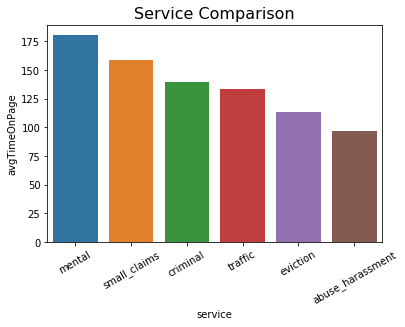

In [9]:
sns.barplot(x='service', y='avgTimeOnPage',
            data=avg_time, order=avg_time.sort_values(by='avgTimeOnPage',ascending=False).service)
plt.xticks(rotation=30,fontsize=10)
plt.title("Service Comparison", size=16)

In [10]:
d1 = df_traffic.groupby(['ga:userGender','ga:userAgeBracket'])['ga:avgTimeOnPage'].mean().reset_index()

NameError: name 'df_traffic' is not defined

Text(0.5, 1, 'Traffic: Avg Time by Gender and Age')

<Figure size 720x576 with 0 Axes>

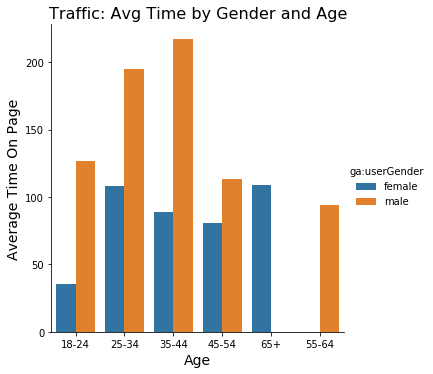

In [222]:
#plt.figure(figsize=(10, 8))
#sns.catplot(x="ga:userAgeBracket", y="ga:avgTimeOnPage", hue="ga:userGender", data=d1, kind='bar')
#plt.ylabel("Average Time On Page", size=14)
#plt.xlabel("Age", size=14)
#plt.title("Traffic: Avg Time by Gender and Age", size=16)

In [457]:
dfs1 = pd.read_excel('/Users/nancy/Desktop/MA799/sub2020_p1.xlsx',sheet_name='data')
dfs2 = pd.read_excel('/Users/nancy/Desktop/MA799/sub2020_p2.xlsx',sheet_name='data')
dfs3 = pd.read_excel('/Users/nancy/Desktop/MA799/sub2020_p3.xlsx',sheet_name='data')
dfs4 = pd.read_excel('/Users/nancy/Desktop/MA799/sub2020_p4.xlsx',sheet_name='data')
dfs5 = pd.read_excel('/Users/nancy/Desktop/MA799/sub2020_p5.xlsx',sheet_name='data')
dfs6 = pd.read_excel('/Users/nancy/Desktop/MA799/sub2020_p6.xlsx',sheet_name='data')
dfs7 = pd.read_excel('/Users/nancy/Desktop/MA799/sub2020_p7.xlsx',sheet_name='data')

In [458]:
dfs1['service']='traffic'
dfs2['service']='small_claims'
dfs3['service']='abuse_harassment'
dfs5['service']='eviction'
dfs6['service']='mental'
dfs7['service']='criminal'

In [468]:
d1 = dfs1.groupby(['ga:deviceCategory','service'])['ga:avgTimeOnPage'].mean().reset_index()
d2 = dfs2.groupby(['ga:deviceCategory','service'])['ga:avgTimeOnPage'].mean().reset_index()
d3 = dfs3.groupby(['ga:deviceCategory','service'])['ga:avgTimeOnPage'].mean().reset_index()
d5 = dfs5.groupby(['ga:deviceCategory','service'])['ga:avgTimeOnPage'].mean().reset_index()
d6 = dfs6.groupby(['ga:deviceCategory','service'])['ga:avgTimeOnPage'].mean().reset_index()
d7 = dfs7.groupby(['ga:deviceCategory','service'])['ga:avgTimeOnPage'].mean().reset_index()
    

In [469]:
d2

,ga:deviceCategory,service,ga:avgTimeOnPage
0,desktop,small_claims,161.518402
1,mobile,small_claims,161.758903
2,tablet,small_claims,47.019608


In [470]:
#no mental data
time = d1.merge(d2, how='outer').merge(d3, how='outer').merge(d5, how='outer').merge(d6, how='outer').merge(d7, how='outer')

In [471]:
time

,ga:deviceCategory,service,ga:avgTimeOnPage
0,desktop,traffic,121.761180
1,mobile,traffic,124.799571
2,tablet,traffic,55.948890
3,desktop,small_claims,161.518402
4,mobile,small_claims,161.758903
5,tablet,small_claims,47.019608
6,desktop,abuse_harassment,81.753803
7,mobile,abuse_harassment,89.061398
8,tablet,abuse_harassment,173.458824
9,desktop,eviction,85.684148


In [349]:
t= time[['service','ga:userGender','ga:uniquePageviews']]

In [351]:
t.pivot(index='ga:userGender',columns='service', values='ga:uniquePageviews')

service,abuse_harassment,criminal,eviction,small_claims,traffic
ga:userGender,,,,,
female,11607,3571,3571,13010,16709
male,10969,3699,2041,13137,29209


In [350]:
t

,service,ga:userGender,ga:uniquePageviews
0,traffic,female,16709
1,traffic,male,29209
2,small_claims,female,13010
3,small_claims,male,13137
4,abuse_harassment,female,11607
5,abuse_harassment,male,10969
6,eviction,female,3571
7,eviction,male,2041
8,criminal,female,3571
9,criminal,male,3699


Text(0.5, 1.0, 'Avg Time On Page by Device and Service')

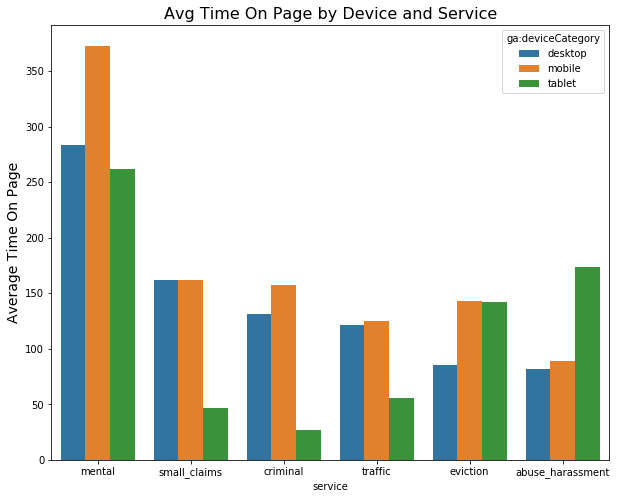

In [472]:
plt.figure(figsize=(10, 8))
a=sns.barplot(x='service',y='ga:avgTimeOnPage',hue='ga:deviceCategory',data=time, order=['mental', 'small_claims','criminal',
                            'traffic','eviction','abuse_harassment'])
#plt.xticks(rotation=30,fontsize=10)

plt.ylabel("Average Time On Page", size=14)
#plt.xlabel("Service", size=14)
#plt.ylim(0,250)
plt.title("Avg Time On Page by Device and Service", size=16)

#b=a.twinx()
#b=sns.lineplot(x='service',y='ga:uniquePageviews',hue='ga:deviceCategory',data=time )

In [46]:
dft1 = pd.read_excel('/Users/nancy/Desktop/MA799/sub20191.xlsx',sheet_name='data')
dft2 = pd.read_excel('/Users/nancy/Desktop/MA799/sub20192.xlsx',sheet_name='data')
dft3 = pd.read_excel('/Users/nancy/Desktop/MA799/sub20193.xlsx',sheet_name='data')
dft4 = pd.read_excel('/Users/nancy/Desktop/MA799/sub20194.xlsx',sheet_name='data')
dft5 = pd.read_excel('/Users/nancy/Desktop/MA799/sub20195.xlsx',sheet_name='data')
dft6 = pd.read_excel('/Users/nancy/Desktop/MA799/sub20196.xlsx',sheet_name='data')
dft7 = pd.read_excel('/Users/nancy/Desktop/MA799/sub20197.xlsx',sheet_name='data')

In [47]:
dft1['service']='traffic'
dft2['service']='small_claims'
dft3['service']='abuse_harassment'
dft5['service']='eviction'
dft6['service']='mental'
dft7['service']='criminal'

In [48]:
time2 = dft1.merge(dft2, how='outer').merge(dft3, how='outer').merge(dft5, how='outer').merge(dft6, how='outer').merge(dft7, how='outer')

In [49]:
time2

,Unnamed: 0,ga:userGender,ga:avgTimeOnPage,service
0,0,female,86.491856,traffic
1,1,male,160.174766,traffic
2,0,female,118.908210,small_claims
3,1,male,195.004722,small_claims
4,0,female,71.779402,abuse_harassment
5,1,male,67.888349,abuse_harassment
6,0,female,81.225847,eviction
7,1,male,65.496516,eviction
8,0,female,192.284379,criminal
9,1,male,141.770035,criminal


Text(0.5, 1.0, 'Avg Time On Page by Gender and Service')

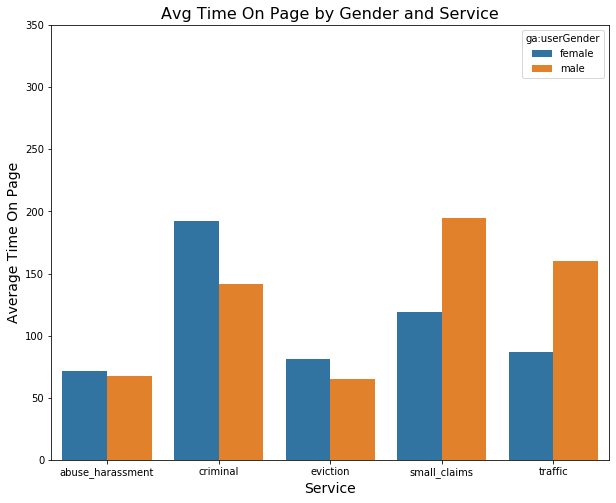

In [56]:
plt.figure(figsize=(10, 8))
a = sns.barplot(x='service',y='ga:avgTimeOnPage',hue='ga:userGender',data=time2, order=['abuse_harassment','criminal',
                                         'eviction','small_claims', 'traffic'                                              ])
plt.xticks(fontsize=10)
plt.ylim(0, 350)
plt.ylabel("Average Time On Page", size=14)
plt.xlabel("Service", size=14)
plt.title("Avg Time On Page by Gender and Service", size=16)

#b=a.twinx()
#b=sns.lineplot(x='service',y='ga:uniquePageviews',hue='ga:userGender',data=time2 )
#plt.ylabel("Unique Pageviews", size=14)

In [119]:
daily = pd.read_excel('/Users/nancy/Desktop/MA799/all2020.xlsx',sheet_name='data')

In [120]:
daily['ga:date'] = [datetime.strptime(str(i), '%Y%m%d') for i in daily['ga:date']]

In [121]:
traffic = daily[daily['ga:pagePath'].str.contains("traffic|ticket")]
sc = daily[daily['ga:pagePath'].str.contains("small-claim")]
ah = daily[daily['ga:pagePath'].str.contains("abuse|harassment")]
ev = daily[daily['ga:pagePath'].str.contains("eviction")]
m =  daily[daily['ga:pagePath'].str.contains("mental-health")]
cov = daily[daily['ga:pagePath'].str.contains("covid")]
cri = daily[daily['ga:pagePath'].str.contains("criminal")]
cri = cri[~cri['ga:pagePath'].str.contains("non-criminal")]

In [122]:
len(cri['ga:pagePath'].unique())

5

In [123]:
ts_t = traffic.groupby('ga:date')['ga:uniquePageviews'].sum()
ts_sc = sc.groupby('ga:date')['ga:uniquePageviews'].sum()
ts_ah = ah.groupby('ga:date')['ga:uniquePageviews'].sum()
ts_ev = ev.groupby('ga:date')['ga:uniquePageviews'].sum()
ts_m = m.groupby('ga:date')['ga:uniquePageviews'].sum()
ts_cov = cov.groupby('ga:date')['ga:uniquePageviews'].sum()
ts_cri = cri.groupby('ga:date')['ga:uniquePageviews'].sum()

In [162]:
len(ts_t)

185

In [128]:
#If we want a weekly aggregation in order to get rid of weekly trend
offset = pd.offsets.timedelta(days=-6)

ts_t_w = ts_t.resample('W', loffset=offset).apply(sum)
ts_sc_w = ts_sc.resample('W', loffset=offset).apply(sum)
ts_ah_w = ts_ah.resample('W', loffset=offset).apply(sum)
ts_ev_w = ts_ev.resample('W', loffset=offset).apply(sum)
ts_m_w = ts_m.resample('W', loffset=offset).apply(sum)
ts_cov_w = ts_cov.resample('W', loffset=offset).apply(sum)
ts_cri_w = ts_cri.resample('W', loffset=offset).apply(sum)

In [133]:
ts_ev_w

ga:date
2020-03-09    547
2020-03-16    651
2020-03-23    710
2020-03-30    981
2020-04-06    654
2020-04-13    680
2020-04-20    610
2020-04-27    502
2020-05-04    448
2020-05-11    461
2020-05-18    459
2020-05-25    469
2020-06-01    511
2020-06-08    481
2020-06-15    466
2020-06-22    547
2020-06-29    539
2020-07-06    578
2020-07-13    543
2020-07-20    569
2020-07-27    541
2020-08-03    513
2020-08-10    536
2020-08-17    515
2020-08-24    550
2020-08-31    584
2020-09-07    333
Freq: W-MON, Name: ga:uniquePageviews, dtype: int64

In [146]:
df1 = pd.read_csv('/Users/nancy/Desktop/MA799/df1.csv')

In [137]:
df1.head()

,Unnamed: 0,Date,C1_School.closing,C1_Flag,C2_Workplace.closing,C2_Flag,C3_Cancel.public.events,C3_Flag,C4_Restrictions.on.gatherings,C4_Flag,C5_Close.public.transport,C5_Flag,C6_Stay.at.home.requirements,C6_Flag,C7_Restrictions.on.internal.movement,C7_Flag,C8_International.travel.controls,E1_Income.support,E1_Flag,E2_Debt.contract.relief,E3_Fiscal.measures,E4_International.support,H1_Public.information.campaigns,H1_Flag,H2_Testing.policy,H3_Contact.tracing,H4_Emergency.investment.in.healthcare,H5_Investment.in.vaccines,H6_Facial.Coverings,H6_Flag,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,X,UniquePageviews,Unique.Pageviews2019,UniquePageviews_traffic,UniquePageviews_smallclaims,target
0,1,3/13/20,2,0,1,1,2,1,2,1,0,0,0,NaN,0,NaN,3,0,NaN,0,0,0.0,2,1,1,1,0,0,0,NaN,NaN,222,0,45.37,45.37,53.57,53.57,35.12,35.12,40.97,40.97,0.0,0.0,4,9786,7328,1827,381,2458
1,2,3/14/20,2,0,1,1,2,1,2,1,0,0,0,NaN,0,NaN,3,0,NaN,0,0,0.0,2,1,1,1,0,0,0,NaN,NaN,295,0,45.37,45.37,53.57,53.57,35.12,35.12,40.97,40.97,0.0,0.0,5,5091,4046,1011,210,1045
2,3,3/15/20,2,0,1,1,2,1,2,1,0,0,0,NaN,0,NaN,3,0,NaN,0,0,0.0,2,1,1,1,0,0,0,NaN,NaN,363,0,45.37,45.37,53.57,53.57,35.12,35.12,40.97,40.97,0.0,0.0,6,8055,3282,1092,250,4773
3,4,3/16/20,2,0,1,1,2,1,2,1,0,0,0,NaN,1,1.0,3,0,NaN,0,10000000,0.0,2,1,1,1,0,0,0,NaN,NaN,512,0,50.93,50.93,63.10,63.10,38.69,38.69,45.14,45.14,0.0,0.0,7,16484,8587,1761,407,7897
4,5,3/17/20,2,1,1,1,2,1,3,1,0,0,0,NaN,1,1.0,3,0,NaN,0,0,0.0,2,1,1,1,5000000,0,0,NaN,NaN,760,0,55.56,55.56,66.67,66.67,41.67,41.67,48.61,48.61,0.0,0.0,8,17294,8542,1638,366,8752


In [147]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 49 columns):
Unnamed: 0                               112 non-null int64
Date                                     112 non-null object
C1_School.closing                        112 non-null int64
C1_Flag                                  112 non-null int64
C2_Workplace.closing                     112 non-null int64
C2_Flag                                  112 non-null int64
C3_Cancel.public.events                  112 non-null int64
C3_Flag                                  112 non-null int64
C4_Restrictions.on.gatherings            112 non-null int64
C4_Flag                                  112 non-null int64
C5_Close.public.transport                112 non-null int64
C5_Flag                                  112 non-null int64
C6_Stay.at.home.requirements             112 non-null int64
C6_Flag                                  101 non-null float64
C7_Restrictions.on.internal.movement     112 non-nul

In [148]:
df1['Date'] = [datetime.strptime(i, '%m/%d/%y') for i in df1['Date']]

In [149]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 49 columns):
Unnamed: 0                               112 non-null int64
Date                                     112 non-null datetime64[ns]
C1_School.closing                        112 non-null int64
C1_Flag                                  112 non-null int64
C2_Workplace.closing                     112 non-null int64
C2_Flag                                  112 non-null int64
C3_Cancel.public.events                  112 non-null int64
C3_Flag                                  112 non-null int64
C4_Restrictions.on.gatherings            112 non-null int64
C4_Flag                                  112 non-null int64
C5_Close.public.transport                112 non-null int64
C5_Flag                                  112 non-null int64
C6_Stay.at.home.requirements             112 non-null int64
C6_Flag                                  101 non-null float64
C7_Restrictions.on.internal.movement     112

In [160]:
df = df1[['Date','target']]

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
Date      112 non-null datetime64[ns]
target    112 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 KB


In [161]:
df  #data not completed (wait Arlo)

,Date,target
0,2020-03-13,2458
1,2020-03-14,1045
2,2020-03-15,4773
3,2020-03-16,7897
4,2020-03-17,8752
5,2020-03-18,7967
6,2020-03-19,1333
7,2020-03-20,1299
8,2020-03-21,379
9,2020-03-22,486


# Feedback data

In [3]:
list_fb = pd.read_excel('/Users/nancy/Desktop/MA799/pagelist_fb.xlsx',sheet_name='data')
#f1 = pd.read_csv('/Users/nancy/Desktop/MA799/feedback1.csv') 
f2 = pd.read_csv('/Users/nancy/Desktop/MA799/feedback2.csv')

In [4]:
list_fb=list(list_fb['ga:pagePath'])
#f1['url']= [x.replace('https://www.mass.gov/', '/') for x in f1['url']]
f2['url']= [x.replace('https://www.mass.gov/', '/') for x in f2['url']]
#d1=f1[f1['url'].isin(list_fb)]
d2=f2[f2['url'].isin(list_fb)]

In [5]:
d2['info_found'].value_counts()

False    2918
True     1110
Name: info_found, dtype: int64

In [6]:
2918/(2918+1110)

0.7244289970208541

In [7]:
(2918+1110)

4028

In [8]:
d2[d2['info_found']==False]['url'].value_counts()[:10]  #top10

/search-court-dockets-calendars-and-case-information             231
/how-to/how-to-search-court-dockets                              106
/locations/worcester-district-court                               96
/traffic-tickets                                                  94
/locations/lowell-district-court                                  67
/lists/small-claims-court-forms                                   58
/info-details/types-of-cases-available-to-the-public-online       52
/location-details/worcester-district-court-jury-information       51
/small-claims                                                     42
/location-details/hampden-county-springfield-jury-information     41
Name: url, dtype: int64

In [14]:
(d2[d2['info_found']==False]['url'].value_counts()/d2['url'].value_counts()).sort_values(ascending=False)[:10]

/info-details/courts-serving-hingham       1.0
/info-details/courts-serving-taunton       1.0
/info-details/courts-serving-sturbridge    1.0
/info-details/courts-serving-stoughton     1.0
/info-details/courts-serving-somerville    1.0
/info-details/courts-serving-saugus        1.0
/info-details/courts-serving-salem         1.0
/info-details/courts-serving-revere        1.0
/info-details/courts-serving-quincy        1.0
/info-details/courts-serving-plymouth      1.0
Name: url, dtype: float64

In [31]:
i1=pd.DataFrame(d2.groupby('url').size())

In [42]:
i1.shape

(317, 1)

In [15]:
neg=d2[d2['info_found']==False]

In [16]:
i2=pd.DataFrame(neg.groupby('url').size())

In [29]:
i2.iloc[:,0].sum()

2918

In [45]:
i2.shape

(293, 1)

In [46]:
i3 = i1.merge(i2,left_index=True, right_index=True,how='outer')

In [47]:
i3['info_not_found_rate'] = round(i3['0_y']/i3['0_x'],2)

In [48]:
i3.reset_index(inplace=True)

In [49]:
i3.shape


(317, 4)

In [50]:
i3.iloc[:,1].sum()

4028

In [51]:
len(neg['url'].unique())

293

In [59]:
#create device column
neg['device']='desktop'
def new_cat(data):
    if data['user_agent'].find('Mobile')!= -1:
        return 'Mobile'
    elif data['user_agent'].find('Tablet')!= -1:
        return 'Tablet'
    else: 
        return 'Desktop'

neg['device'] = neg.apply(new_cat, axis=1)

In [44]:
#neg[neg['user_agent'].str.contains('Mobile')]

In [52]:
#split into different services
traffic2 = list()
small_claims2 = list()
abuse_harassment2 = list()
locations2 = list()
eviction2 = list()
mental2 = list()
covid2 = list()
criminal2 = list()

for i in list_fb:
    if ('traffic' in i):
        traffic2.append(i)
    elif 'small-claim' in i:
        small_claims2.append(i)
    elif ('abuse' in i) or ('harassment' in i) or ('protection' in i):
        abuse_harassment2.append(i)
    elif ('location' in i) or ('courts-serving' in i):
        locations2.append(i)
    elif 'eviction' in i:
        eviction2.append(i)
    elif ('mental-health' in i) or ('drug' in i) or ('specialty-courts' in i):
        mental2.append(i)
    elif 'covid' in i:
        covid2.append(i)
    elif ('criminal' in i) or ('bail' in i):
        criminal2.append(i)

In [53]:
group2 = traffic2 + small_claims2 + abuse_harassment2 + locations2 + eviction2 + mental2 + covid2 + criminal2
other2 = [p for p in list_fb if p not in group2]

In [55]:
device = pd.read_excel('/Users/nancy/Desktop/MA799/feedback_device.xlsx',sheet_name='data')

In [56]:
device

,Service,Device,UniquePageView,avgTimeOnPage,UniquePageView(%)
0,traffic,desktop,156818,158.5,0.495119
1,traffic,mobile,159910,167.6,0.504881
2,small_claim,desktop,113156,171.9,0.633402
3,small_claim,mobile,65492,194.0,0.366598
4,abuse_harassment,desktop,58034,79.2,0.362914
5,abuse_harassment,mobile,101877,94.1,0.637086
6,location,desktop,301629,115.6,0.504258
7,location,mobile,296535,107.4,0.495742
8,eviction,desktop,20921,87.4,0.520358
9,eviction,mobile,19284,114.3,0.479642


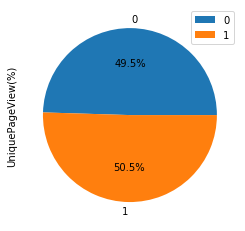

In [77]:
#traffic
device.iloc[:2,[1,4]].plot.pie(y='UniquePageView(%)',x='Device',autopct="%.1f%%")

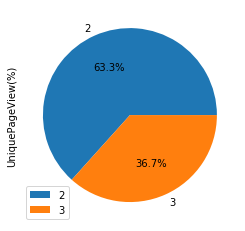

In [78]:
#small claims
device.iloc[2:4,[1,4]].plot.pie(y='UniquePageView(%)',x='Device',autopct="%.1f%%")

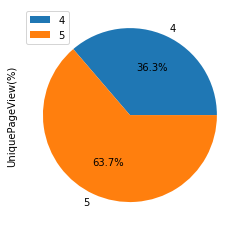

In [79]:
#abuse
device.iloc[4:6,[1,4]].plot.pie(y='UniquePageView(%)',x='Device',autopct="%.1f%%")

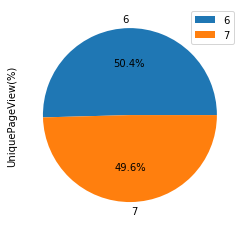

In [80]:
#location
device.iloc[6:8,[1,4]].plot.pie(y='UniquePageView(%)',x='Device',autopct="%.1f%%")

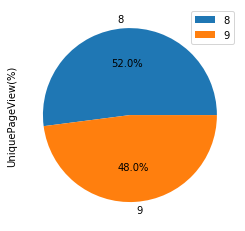

In [81]:
#eviction
device.iloc[8:10,[1,4]].plot.pie(y='UniquePageView(%)',x='Device',autopct="%.1f%%")

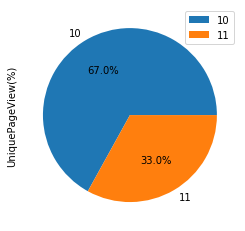

In [82]:
#mental
device.iloc[10:12,[1,4]].plot.pie(y='UniquePageView(%)',x='Device',autopct="%.1f%%")

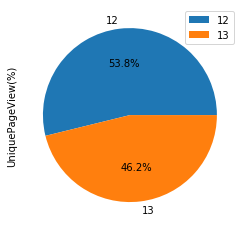

In [83]:
#criminal
device.iloc[12:14,[1,4]].plot.pie(y='UniquePageView(%)',x='Device',autopct="%.1f%%")

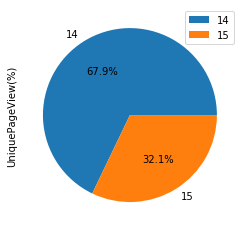

In [84]:
#others
device.iloc[14:16,[1,4]].plot.pie(y='UniquePageView(%)',x='Device',autopct="%.1f%%")

In [60]:
#countbyservice
print(len(neg[neg['url'].isin(traffic2)]['url']))
print(neg[neg['url'].isin(traffic2)]['url'].value_counts())
print(neg[neg['url'].isin(traffic2)].groupby(['url','device']).size())
neg[neg['url'].isin(traffic2)].groupby('device').size()

131
/traffic-tickets                                                     94
/info-details/find-out-what-to-expect-at-a-traffic-ticket-hearing    24
/info-details/what-to-expect-at-a-traffic-ticket-hearing             12
/info-details/find-out-who-can-appeal-a-traffic-ticket-decision       1
Name: url, dtype: int64
url                                                                device 
/info-details/find-out-what-to-expect-at-a-traffic-ticket-hearing  Desktop    13
                                                                   Mobile     11
/info-details/find-out-who-can-appeal-a-traffic-ticket-decision    Desktop     1
/info-details/what-to-expect-at-a-traffic-ticket-hearing           Desktop     4
                                                                   Mobile      8
/traffic-tickets                                                   Desktop    59
                                                                   Mobile     35
dtype: int64


device
Desktop    77
Mobile     54
dtype: int64

In [61]:
print(len(neg[neg['url'].isin(small_claims2)]['url']))
print(neg[neg['url'].isin(small_claims2)]['url'].value_counts())
print(neg[neg['url'].isin(small_claims2)].groupby(['url','device']).size())
neg[neg['url'].isin(small_claims2)].groupby('device').size()

218
/lists/small-claims-court-forms                                                                   58
/small-claims                                                                                     42
/service-details/find-out-if-youre-eligible-to-file-a-small-claim                                 39
/service-details/small-claims-for-defendants                                                      24
/service-details/learn-what-to-expect-at-a-small-claims-trial                                     13
/how-to/file-a-small-claim-in-the-boston-municipal-court-district-court-or-housing-court          13
/service-details/what-to-do-if-you-lose-your-small-claims-case                                    11
/service-details/information-about-small-claims-payment-orders-and-hearings                        7
/service-details/special-requirements-for-filing-a-small-claim-for-money-owed-to-your-trade-or     7
/service-details/what-to-do-if-you-win-your-small-claims-case                          

device
Desktop    162
Mobile      56
dtype: int64

In [32]:
print(len(neg[neg['url'].isin(abuse_harassment2)]['url']))
neg[neg['url'].isin(abuse_harassment2)]['url'].value_counts()
print(neg[neg['url'].isin(abuse_harassment2)].groupby(['url','device']).size())
neg[neg['url'].isin(abuse_harassment2)].groupby('device').size()

92
url                                                                                             device 
/abuse-prevention-orders-for-defendants                                                         Desktop     2
                                                                                                Mobile      2
/abuse-prevention-orders-for-plaintiffs                                                         Mobile      2
/extreme-risk-protection-orders                                                                 Desktop     5
/harassment-prevention-orders                                                                   Desktop     4
                                                                                                Mobile      3
/how-to/request-a-harassment-prevention-order                                                   Desktop     3
                                                                                                Mobile      6
/how-to/reque

device
Desktop    51
Mobile     41
dtype: int64

In [33]:
print(len(neg[neg['url'].isin(locations2)]['url']))
print(len(neg[neg['url'].isin(locations2)]['url'].unique()))
print(neg[neg['url'].isin(locations2)]['url'].value_counts())
#print(neg[neg['url'].isin(locations2)].groupby(['url','device']).size().sort_values(ascending=False))
neg[neg['url'].isin(locations2)].groupby('device').size()

1517
159
/locations/worcester-district-court                                       96
/locations/lowell-district-court                                          67
/location-details/worcester-district-court-jury-information               51
/location-details/hampden-county-springfield-jury-information             41
/locations/plymouth-district-court                                        40
/locations/brockton-district-court                                        36
/locations/quincy-district-court                                          35
/locations/salem-district-court                                           33
/locations/springfield-district-court                                     33
/locations/lawrence-district-court                                        33
/locations/fall-river-district-court                                      31
/locations/chelsea-district-court                                         31
/locations/barnstable-district-court                               

device
Desktop    727
Mobile     788
Tablet       2
dtype: int64

In [34]:
print(len(neg[neg['url'].isin(eviction2)]['url']))
neg[neg['url'].isin(eviction2)]['url'].value_counts()
print(neg[neg['url'].isin(eviction2)].groupby(['url','device']).size())
neg[neg['url'].isin(eviction2)].groupby('device').size()

34
url                              device 
/eviction-for-landlords          Desktop     7
                                 Mobile      8
/how-to/file-an-eviction-case    Desktop     4
                                 Mobile      1
/lists/court-forms-for-eviction  Desktop    14
dtype: int64


device
Desktop    25
Mobile      9
dtype: int64

In [35]:
print(len(neg[neg['url'].isin(mental2)]['url']))
neg[neg['url'].isin(mental2)]['url'].value_counts()
print(neg[neg['url'].isin(mental2)].groupby(['url','device']).size())
neg[neg['url'].isin(mental2)].groupby('device').size()

30
url                                                         device 
/info-details/drug-courts                                   Desktop     7
                                                            Mobile      3
/lists/mental-health-court-forms                            Desktop    10
                                                            Mobile      4
/service-details/mental-health-court-recovery-with-justice  Desktop     2
                                                            Mobile      1
/specialty-courts                                           Desktop     2
                                                            Mobile      1
dtype: int64


device
Desktop    21
Mobile      9
dtype: int64

In [186]:
print(len(neg[neg['url'].isin(criminal2)]['url']))
neg[neg['url'].isin(criminal2)]['url'].value_counts()
print(neg[neg['url'].isin(criminal2)].groupby(['url','device']).size())
neg[neg['url'].isin(criminal2)].groupby('device').size()

100
url                                                                                                device 
/bail                                                                                              Desktop     3
                                                                                                   Mobile      2
/expunge-your-criminal-record                                                                      Desktop     4
                                                                                                   Mobile      2
/handbook/understanding-the-criminal-court-process                                                 Desktop     1
                                                                                                   Mobile      1
/how-to/file-a-criminal-complaint                                                                  Desktop     6
                                                                                                  

device
Desktop    61
Mobile     39
dtype: int64

In [187]:
print(len(neg[neg['url'].isin(other2)]['url']))
print(len(neg[neg['url'].isin(other2)]['url'].unique()))
print(neg[neg['url'].isin(other2)]['url'].value_counts())

print(neg[neg['url'].isin(other2)].groupby(['url','device']).size())
neg[neg['url'].isin(other2)].groupby('device').size()

795
79
/search-court-dockets-calendars-and-case-information                                                    231
/how-to/how-to-search-court-dockets                                                                     106
/info-details/types-of-cases-available-to-the-public-online                                              52
/lists/district-court-forms                                                                              39
/lists/court-forms-for-civil-matters                                                                     35
/how-to/view-electronic-case-information-through-the-attorney-portal                                     27
/orgs/district-court                                                                                     25
/info-details/boston-municipal-court-and-district-court-filing-fees                                      24
/how-to/pay-a-littering-or-trash-disposal-violation-ticket                                               14
/info-details/distric

device
Desktop    514
Mobile     281
dtype: int64

In [171]:
p1={'Feedback(Info not found)':[77,54,162,56,51,41,727,788,25,9,21,9,61,39,514,281],
    'Device':['Desktop','Mobile','Desktop','Mobile','Desktop','Mobile','Desktop','Mobile','Desktop','Mobile','Desktop','Mobile','Desktop','Mobile','Desktop','Mobile'],
    'Service':['traffic','traffic','small_claims','small_claims','abuse_harassment','abuse_harassment',
               'locations','locations','eviction','eviction','mental','mental','criminal','criminal','others','others']}

p1=pd.DataFrame(p1)

In [172]:
p1

,Feedback(Info not found),Device,Service
0,77,Desktop,traffic
1,54,Mobile,traffic
2,162,Desktop,small_claims
3,56,Mobile,small_claims
4,51,Desktop,abuse_harassment
5,41,Mobile,abuse_harassment
6,727,Desktop,locations
7,788,Mobile,locations
8,25,Desktop,eviction
9,9,Mobile,eviction


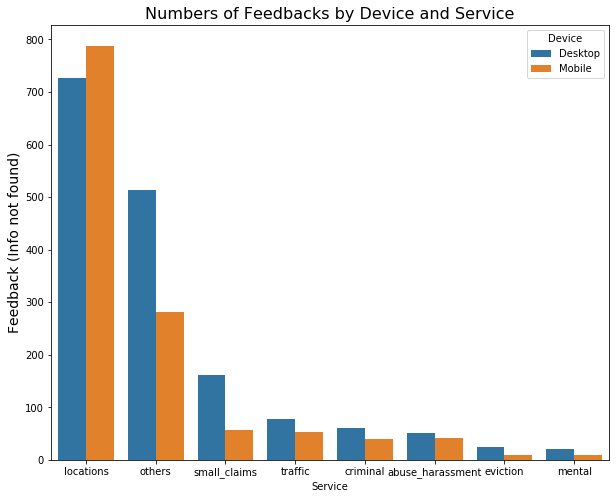

In [170]:
plt.figure(figsize=(10, 8))
a=sns.barplot(x='Service',y='Feedback(Info not found)',hue='Device',data=p1,
             order=['locations','others','small_claims','traffic','criminal','abuse_harassment','eviction','mental'])
#plt.xticks(rotation=30,fontsize=10)

plt.ylabel("Feedback (Info not found)", size=14)
#plt.xlabel("Service", size=14)
#plt.ylim(0,250)
plt.title("Numbers of Feedbacks by Device and Service", size=16)


In [191]:
for s in [traffic2,small_claims2,abuse_harassment2,locations2,eviction2,mental2,criminal2,other2]:
    #print(s,neg[neg['url'].isin(s)].groupby('device').size())
    print(len(neg[neg['url'].isin(s)]['url']))

131
218
92
1517
34
30
100
795


In [62]:
grade = pd.read_csv('/Users/nancy/Desktop/MA799/grade.csv') 

In [63]:
grade.head()

,ga.pagePath,sessions,uniquePageview,bounceRate,avgTimeOnPage,exitRate,newUsers,organicSearches,grade,service,content_type
0,/info-details/district-court-justices,15.151351,21.778378,62.733640,210.206777,62.600248,5.475676,7.037838,4.0,other,info_details
1,/lists/criminal-model-jury-instructions-for-us...,35.464865,46.454054,25.988574,307.211391,56.282791,5.367568,7.140541,5.0,criminal,curated_list
2,/lists/mental-health-court-forms,7.162162,27.000000,37.485852,185.018339,36.533382,1.972973,1.832432,6.0,mental,curated_list
3,/how-to/appeal-your-traffic-ticket,39.421622,89.145946,34.276431,192.038119,51.741010,16.302703,18.848649,7.0,traffic,how_to_page
4,/how-to/pay-your-traffic-ticket,216.967568,489.691892,14.119274,252.466297,61.903293,82.562162,122.227027,7.0,traffic,how_to_page


In [301]:
#grade[(grade['grade']>8) & (grade['content_type']=='location')]

In [64]:
#hd['content_type'].value_counts()

NameError: name 'hd' is not defined

In [161]:
#hd['service'].value_counts()

locations           31
other                7
abuse_harassment     6
small_claims         4
criminal             3
traffic              2
mental               2
eviction             1
Name: service, dtype: int64

In [172]:
#grade[(grade['content_type']=='location')] #not much dif in grad7 & grad13

In [96]:
#add content type
c = pd.read_csv('/Users/nancy/Desktop/MA799/distict_court_metrics.csv')

In [66]:
c.head()

,hit_date,node_id,url_at_the_time,current_url_if_exists,primary_org,content_type
0,2019-03-01 0:00:00,11411,/how-to/appeal-your-traffic-ticket,/how-to/appeal-your-traffic-ticket,Boston Municipal Court,how_to_page
1,2019-03-01 0:00:00,11746,/how-to/pay-your-traffic-ticket,/how-to/pay-your-traffic-ticket,Massachusetts Registry of Motor Vehicles,how_to_page
2,2019-03-01 0:00:00,46146,/locations/brockton-district-court,/locations/brockton-district-court,Massachusetts Court System,location
3,2019-03-01 0:00:00,46221,/location-details/cambridge-district-court-jur...,/location-details/cambridge-district-court-jur...,District Court,location_details
4,2019-03-01 0:00:00,46256,/location-details/chelsea-district-court-jury-...,/location-details/chelsea-district-court-jury-...,District Court,location_details


In [97]:
c1 = c.drop_duplicates(subset='url_at_the_time', keep='first')

In [98]:
c1=c1.drop(['hit_date','node_id','current_url_if_exists','primary_org'],axis=1)
c1=c1.append({'url_at_the_time':'/search-court-dockets-calendars-and-case-information','content_type':'service_page'},
          ignore_index=True)

In [99]:
neg2 = neg.merge(c1,how='left',left_on='url',right_on='url_at_the_time')

In [78]:
i3.head()

,url,0_x,0_y,info_not_found_rate
0,/abuse-prevention-orders-for-defendants,5,4.0,0.80
1,/abuse-prevention-orders-for-plaintiffs,2,2.0,1.00
2,/bail,6,5.0,0.83
3,/district-court-appellate-division,3,3.0,1.00
4,/district-court-department-forms-resources,6,6.0,1.00


In [79]:
i4 = i3.merge(c1,how='left',left_on='url',right_on='url_at_the_time')

In [80]:
i4.shape

(317, 6)

In [108]:
neg2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 2917
Data columns (total 14 columns):
timestamp                   2918 non-null object
url                         2918 non-null object
user_agent                  2918 non-null object
info_found                  2918 non-null bool
explain                     2918 non-null object
org_name                    2918 non-null object
easy_to_use                 202 non-null float64
confident                   204 non-null float64
visit_purpose               164 non-null object
professional_or_personal    204 non-null object
other_feedback              63 non-null object
device                      2918 non-null object
url_at_the_time             2918 non-null object
content_type                2918 non-null object
dtypes: bool(1), float64(2), object(11)
memory usage: 322.0+ KB


In [101]:
p = neg2[neg2['content_type'].isna()]['url'].unique()
len(p)

41

In [86]:
neg2['content_type'].unique()

array(['location', 'how_to_page', 'service_page', nan, 'service_details',
       'location_details', 'curated_list', 'info_details', 'org_page',
       'rules', 'guide_page', 'news'], dtype=object)

In [102]:
p

array(['/locations/fall-river-district-court',
       '/locations/westborough-district-court',
       '/locations/wareham-district-court',
       '/locations/attleboro-district-court',
       '/lists/restraining-order-harassment-court-forms',
       '/location-details/new-bedford-district-juvenile-court-jury-information',
       '/locations/fitchburg-district-court',
       '/locations/dudley-district-court',
       '/locations/eastern-hampshire-district-court',
       '/locations/barnstable-district-court',
       '/info-details/find-out-what-to-expect-at-a-traffic-ticket-hearing',
       '/location-details/ayer-district-court-jury-information',
       '/locations/brookline-district-court',
       '/locations/wrentham-district-court',
       '/lists/firearms-court-forms', '/locations/ayer-district-court',
       '/locations/dedham-district-court',
       '/locations/falmouth-district-court',
       '/location-details/barnstable-district-court-jury-information',
       '/locations/edga

In [103]:
p2 = i4[i4['content_type'].isna()]['url'].unique()
len(p2)

43

In [104]:
content=['location','location','location','location','curated_list',
         'location_details','location','location','location','location',
         'info_details','location_details','location','location','curated_list',
         'location','location','location','location_details','location',
         'location','location','info_details','curated_list','location_details',
         'location','rules','how_to_page','curated_list','location',
         'location','info_details','location','rules','location_details',
         'location','location','rules','location_details','rules',
         'rules']


In [105]:
c2 = pd.DataFrame({'url_at_the_time':p,'content_type':content})

In [106]:
c1=c1.append(c2)

In [107]:
neg2 = neg.merge(c1,how='left',left_on='url',right_on='url_at_the_time')

In [321]:
neg2['content_type'].unique()

array(['location', 'how_to_page', 'service_page', 'rules', 'curated_list',
       'service_details', 'info_details', 'guide_page', 'org_page'],
      dtype=object)

In [109]:
print(neg2.groupby(['content_type','device']).size())
neg2.groupby(['content_type']).size()

content_type      device 
curated_list      Desktop    214
                  Mobile      36
guide_page        Desktop      5
                  Mobile       1
how_to_page       Desktop    146
                  Mobile      94
info_details      Desktop    152
                  Mobile     130
location          Desktop    487
                  Mobile     568
                  Tablet       1
location_details  Desktop    203
                  Mobile     176
                  Tablet       1
news              Desktop      4
                  Mobile       4
org_page          Desktop      8
                  Mobile      17
rules             Desktop     24
                  Mobile      11
service_details   Desktop    120
                  Mobile      65
service_page      Desktop    276
                  Mobile     175
dtype: int64


content_type
curated_list         250
guide_page             6
how_to_page          240
info_details         282
location            1056
location_details     380
news                   8
org_page              25
rules                 35
service_details      185
service_page         451
dtype: int64

In [116]:
p2={'Feedback(Info not found)':[214,36,146,94,152,130,487,568,203,176,120,65,276,175],
    'Device':['Desktop','Mobile','Desktop','Mobile','Desktop','Mobile','Desktop','Mobile','Desktop','Mobile','Desktop','Mobile','Desktop','Mobile'],
    'Content Type':['Form','Form','How_to_page','How_to_page','Info_details','Info_details','Location','Location',
                'Location_details','Location_details',    
              'Service_details','Service_details','Service_page','Service_page']}



In [117]:
p2=pd.DataFrame(p2)

In [118]:
p2

,Feedback(Info not found),Device,Content Type
0,214,Desktop,Form
1,36,Mobile,Form
2,146,Desktop,How_to_page
3,94,Mobile,How_to_page
4,152,Desktop,Info_details
5,130,Mobile,Info_details
6,487,Desktop,Location
7,568,Mobile,Location
8,203,Desktop,Location_details
9,176,Mobile,Location_details


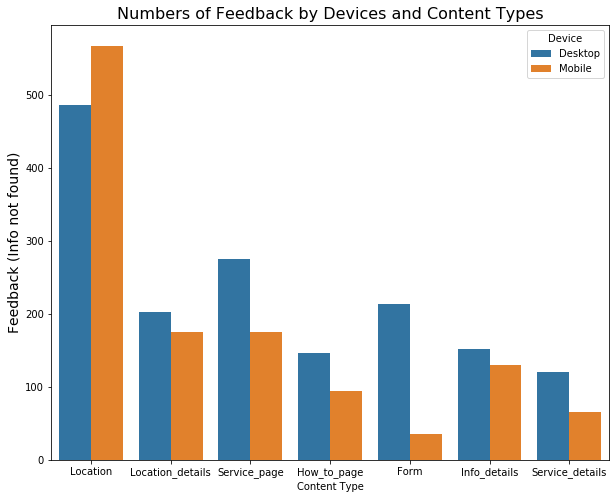

In [194]:

plt.figure(figsize=(10, 8))
a=sns.barplot(x='Content Type',y='Feedback(Info not found)',hue='Device',data=p2,
             order=['Location','Location_details','Service_page','How_to_page','Form','Info_details','Service_details'])
plt.xticks(fontsize=10)

plt.ylabel("Feedback (Info not found)", size=14)
#plt.xlabel("Service", size=14)
#plt.ylim(0,250)
plt.title("Numbers of Feedback by Devices and Content Types", size=16)
plt.savefig('fb.png')

In [120]:
neg2.groupby(['content_type','url']).size()

content_type      url                                                                                                 
curated_list      /lists/attorney-court-forms                                                                               8
                  /lists/court-forms-for-civil-matters                                                                     35
                  /lists/court-forms-for-consumer-debt-collection-civil-rules-81-and-551                                    9
                  /lists/court-forms-for-criminal-matters                                                                  11
                  /lists/court-forms-for-criminal-records                                                                  17
                  /lists/court-forms-for-eviction                                                                          14
                  /lists/court-forms-for-supplementary-process                                                              1

# Merge grade level

In [121]:
grade_level = pd.read_csv('/Users/nancy/Desktop/MA799/courts_grade_level_2018-05-11_2020-11-16.csv') 

In [122]:
grade_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540338 entries, 0 to 540337
Data columns (total 4 columns):
collection_date    540338 non-null object
node_id            540338 non-null int64
node_path          540338 non-null object
grade_level        540338 non-null int64
dtypes: int64(2), object(2)
memory usage: 16.5+ MB


In [123]:
grade_level.head()

,collection_date,node_id,node_path,grade_level
0,2018-05-11,224186,/rules-of-civil-procedure/civil-procedure-rule...,9
1,2018-05-11,79066,/how-to/e-filing-in-the-supreme-judicial-court...,9
2,2018-05-11,64736,/locations/orleans-district-court,8
3,2018-05-11,66071,/locations/woburn-district-court,6
4,2018-05-11,63436,/how-to/get-a-child-support-order,8


In [124]:
g = grade_level[grade_level['node_path'].isin(list_fb)].groupby('node_path')['grade_level'].max().sort_values()
g = pd.DataFrame(g)

In [270]:
len(grade_level[grade_level['node_path'].isin(list_fb2)].groupby('node_path')['grade_level'].max().sort_values())

195

In [137]:
g1 = grade_level[grade_level['node_path'].isin(i3['url'])].groupby('node_path')['grade_level'].max().sort_values()
g1 = pd.DataFrame(g1)

In [136]:
i3['url']

0                /abuse-prevention-orders-for-defendants
1                /abuse-prevention-orders-for-plaintiffs
2                                                  /bail
3                     /district-court-appellate-division
4             /district-court-department-forms-resources
5              /district-court-rules-and-standing-orders
6      /districtmunicipal-court-rules/district-court-...
7      /districtmunicipal-court-rules/district-court-...
8      /districtmunicipal-court-rules/district-court-...
9      /districtmunicipal-court-rules/district-court-...
10     /districtmunicipal-court-rules/district-court-...
11     /districtmunicipal-court-rules/district-court-...
12     /districtmunicipal-court-rules/district-court-...
13     /districtmunicipal-court-rules/district-court-...
14     /districtmunicipal-court-rules/district-court-...
15     /districtmunicipal-court-rules/district-court-...
16     /districtmunicipal-court-rules/joint-standing-...
17     /districtmunicipal-court

In [138]:
g1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, /lists/criminal-model-jury-instructions-for-use-in-the-district-court to /service-details/mental-health-court-recovery-with-justice
Data columns (total 1 columns):
grade_level    208 non-null int64
dtypes: int64(1)
memory usage: 3.2+ KB


In [139]:
g1.head()

,grade_level
node_path,
/lists/criminal-model-jury-instructions-for-use-in-the-district-court,5
/lists/court-forms-for-consumer-debt-collection-civil-rules-81-and-551,5
/location-details/concord-district-court-jury-information,6
/location-details/northampton-district-court-jury-information,6
/location-details/malden-district-court-jury-information,6


In [126]:
#num_fb = pd.DataFrame(neg2.groupby('url').size())

In [141]:
#pd.DataFrame(neg2.groupby('url').size())

In [127]:
#list_fb2 = list(num_fb.index)

In [144]:
#create all info dataset
"""Hello Analytics Reporting API V4."""

from apiclient.discovery import build
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd


SCOPES = ['https://www.googleapis.com/auth/analytics.readonly']
KEY_FILE_LOCATION = '/Users/nancy/Desktop/MA799/spring-monolith-290419-6623c11f5199.json'
VIEW_ID = '140110673'


def initialize_analyticsreporting():
  """Initializes an Analytics Reporting API V4 service object.

  Returns:
    An authorized Analytics Reporting API V4 service object.
  """
  credentials = ServiceAccountCredentials.from_json_keyfile_name(
      KEY_FILE_LOCATION, SCOPES)

  # Build the service object.
  analytics = build('analyticsreporting', 'v4', credentials=credentials)

  return analytics


def get_report(analytics):
  """Queries the Analytics Reporting API V4.

  Args:
    analytics: An authorized Analytics Reporting API V4 service object.
  Returns:
    The Analytics Reporting API V4 response.
  """
  return analytics.reports().batchGet(
      body={
        'reportRequests': [
        {
          'viewId': VIEW_ID,
          'dateRanges': [{'startDate': '2019-08-01', 'endDate': '2020-08-31'}],
          'metrics': [{'expression': 'ga:uniquePageviews'},{'expression': 'ga:sessions'},
                      {'expression': 'ga:newUsers'},{'expression': 'ga:bounceRate'},
                      {'expression': 'ga:organicSearches'},{'expression': 'ga:exitRate'}
                     ],
          'dimensions': [{'name': 'ga:pagePath'}],
          'dimensionFilterClauses': [
                            {"filters": [{"dimensionName": "ga:pagePath",
                                          "operator": "IN_LIST",
                                          "expressions": list(i3['url'])}]}],
          "pageSize": 100000

    }]}
  ).execute()


def print_response(response):
  """Parses and prints the Analytics Reporting API V4 response.

  Args:
    response: An Analytics Reporting API V4 response.
  """
  for report in response.get('reports', []):
    columnHeader = report.get('columnHeader', {})
    dimensionHeaders = columnHeader.get('dimensions', [])
    metricHeaders = columnHeader.get('metricHeader', {}).get('metricHeaderEntries', [])

    for row in report.get('data', {}).get('rows', []):
      dimensions = row.get('dimensions', [])
      dateRangeValues = row.get('metrics', [])

      for header, dimension in zip(dimensionHeaders, dimensions):
        print(header + ': ', dimension)

      for i, values in enumerate(dateRangeValues):
        print('Date range:', str(i))
        for metricHeader, value in zip(metricHeaders, values.get('values')):
          print(metricHeader.get('name') + ':', value)
          
          
#new add
def response_df(response):
  list = []
  # get report data
  for report in response.get('reports', []):
    # set column headers
    columnHeader = report.get('columnHeader', {})
    dimensionHeaders = columnHeader.get('dimensions', [])
    metricHeaders = columnHeader.get('metricHeader', {}).get('metricHeaderEntries', [])
    rows = report.get('data', {}).get('rows', [])
    
    for row in rows:
        # create dict for each row
        dict = {}
        dimensions = row.get('dimensions', [])
        dateRangeValues = row.get('metrics', [])

        # fill dict with dimension header (key) and dimension value (value)
        for header, dimension in zip(dimensionHeaders, dimensions):
          dict[header] = dimension

        # fill dict with metric header (key) and metric value (value)
        for i, values in enumerate(dateRangeValues):
          for metric, value in zip(metricHeaders, values.get('values')):
            #set int as int, float a float
            if ',' in value or '.' in value:
              dict[metric.get('name')] = float(value)
            else:
              dict[metric.get('name')] = int(value)

        list.append(dict)
    
    df = pd.DataFrame(list)
    return df   


def save_df_to_excel(df, path, file_name, sheet_name):
  writer = pd.ExcelWriter(path+file_name+'.xlsx', engine='xlsxwriter')
  df.to_excel(writer, sheet_name=sheet_name)
  writer.save()       
###          
    
          
          
def main():
  analytics = initialize_analyticsreporting()
  response = get_report(analytics)
  df = response_df(response)
  print(df)
  save_df_to_excel(
  df=df,
  path='/Users/nancy/Desktop/MA799/',
  file_name='data_fb_new',
  sheet_name='data')

if __name__ == '__main__':
  main()


                                           ga:pagePath  ga:uniquePageviews  \
0              /abuse-prevention-orders-for-defendants                5663   
1              /abuse-prevention-orders-for-plaintiffs                4202   
2                                                /bail                6344   
3                   /district-court-appellate-division                2119   
4           /district-court-department-forms-resources                3511   
5            /district-court-rules-and-standing-orders                5269   
6    /districtmunicipal-court-rules/district-court-...                1775   
7    /districtmunicipal-court-rules/district-court-...                 749   
8    /districtmunicipal-court-rules/district-court-...                2268   
9    /districtmunicipal-court-rules/district-court-...                 407   
10   /districtmunicipal-court-rules/district-court-...                9761   
11   /districtmunicipal-court-rules/district-court-...          

In [145]:
data_fb = pd.read_excel('/Users/nancy/Desktop/MA799/data_fb_new.xlsx',sheet_name='data')

In [146]:
data_fb.head()

,Unnamed: 0,ga:pagePath,ga:uniquePageviews,ga:sessions,ga:newUsers,ga:bounceRate,ga:organicSearches,ga:exitRate
0,0,/abuse-prevention-orders-for-defendants,5663,2875,1366,40.417391,1562,26.518952
1,1,/abuse-prevention-orders-for-plaintiffs,4202,723,289,39.695712,305,14.065615
2,2,/bail,6344,5168,2410,30.495356,2685,32.456243
3,3,/district-court-appellate-division,2119,1190,214,35.546218,395,26.809453
4,4,/district-court-department-forms-resources,3511,371,74,17.250674,76,9.253865


In [152]:
data_fb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 316
Data columns (total 9 columns):
Unnamed: 0            315 non-null int64
ga:pagePath           315 non-null object
ga:uniquePageviews    315 non-null int64
ga:sessions           315 non-null int64
ga:newUsers           315 non-null int64
ga:bounceRate         315 non-null float64
ga:organicSearches    315 non-null int64
ga:exitRate           315 non-null float64
service               315 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 24.6+ KB


In [148]:
print(data_fb.index[data_fb['ga:pagePath']=='/search-court-dockets-calendars-and-case-information'])
print(data_fb.index[data_fb['ga:pagePath']=='/how-to/how-to-search-court-dockets'])
           

Int64Index([287], dtype='int64')
Int64Index([41], dtype='int64')


In [149]:
data_fb = data_fb.drop([287,41])

In [150]:
#add service
conditions = [
    (data_fb['ga:pagePath'].isin(traffic2)),
    (data_fb['ga:pagePath'].isin(small_claims2)),
    (data_fb['ga:pagePath'].isin(abuse_harassment2)),
    (data_fb['ga:pagePath'].isin(locations2)),
    (data_fb['ga:pagePath'].isin(eviction2)),
    (data_fb['ga:pagePath'].isin(mental2)),
    (data_fb['ga:pagePath'].isin(criminal2)),
    (data_fb['ga:pagePath'].isin(other2))]

values = ['traffic',
'small_claims',
'abuse_harassment',
'locations',
'eviction',
'mental',
'criminal',
'other']

data_fb['service'] = np.select(conditions, values)


In [151]:
data_fb

,Unnamed: 0,ga:pagePath,ga:uniquePageviews,ga:sessions,ga:newUsers,ga:bounceRate,ga:organicSearches,ga:exitRate,service
0,0,/abuse-prevention-orders-for-defendants,5663,2875,1366,40.417391,1562,26.518952,abuse_harassment
1,1,/abuse-prevention-orders-for-plaintiffs,4202,723,289,39.695712,305,14.065615,abuse_harassment
2,2,/bail,6344,5168,2410,30.495356,2685,32.456243,criminal
3,3,/district-court-appellate-division,2119,1190,214,35.546218,395,26.809453,other
4,4,/district-court-department-forms-resources,3511,371,74,17.250674,76,9.253865,other
5,5,/district-court-rules-and-standing-orders,5269,2049,394,14.787701,702,9.706546,other
6,6,/districtmunicipal-court-rules/district-court-...,1775,486,115,70.781893,9,54.115328,other
7,7,/districtmunicipal-court-rules/district-court-...,749,461,128,40.780911,150,56.575682,other
8,8,/districtmunicipal-court-rules/district-court-...,2268,731,281,45.827633,69,46.647646,other
9,9,/districtmunicipal-court-rules/district-court-...,407,23,2,8.695652,2,7.349666,other


In [153]:
a = data_fb.merge(c1,how='left',left_on='ga:pagePath',right_on='url_at_the_time')

In [154]:
a=a.merge(g1,how='left',left_on='ga:pagePath',right_on='node_path')

In [158]:
a=a.merge(i3,how='left',left_on='ga:pagePath',right_on='url')

In [157]:
i3.head()

,url,0_x,0_y,info_not_found_rate
0,/abuse-prevention-orders-for-defendants,5,4.0,0.80
1,/abuse-prevention-orders-for-plaintiffs,2,2.0,1.00
2,/bail,6,5.0,0.83
3,/district-court-appellate-division,3,3.0,1.00
4,/district-court-department-forms-resources,6,6.0,1.00


In [166]:
i3['url'].isin(a['ga:pagePath'])

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
30      True
31      True
32      True
33      True
34      True
35      True
36      True
37      True
38      True
39      True
40      True
41     False
42      True
43      True
44      True
45      True
46      True
47      True
48      True
49      True
50      True
51      True
52      True
53      True
54      True
55      True
56      True
57      True
58      True
59      True
60      True
61      True
62      True
63      True
64      True
65      True
66      True
67      True
68      True
69      True
70      True
71      True
72      True
73      True
74      True
75      True
76      True

In [175]:
a.info()

AttributeError: 'AxesSubplot' object has no attribute 'info'

In [176]:
a.drop(['Unnamed: 0','url_at_the_time'],axis=1,inplace=True)

AttributeError: 'AxesSubplot' object has no attribute 'drop'

In [162]:
save_df_to_excel(
  df=a,
  path='/Users/nancy/Desktop/MA799/',
  file_name='cleandata_fb4',
  sheet_name='data')

In [298]:
data_fb2 = pd.read_excel('/Users/nancy/Desktop/MA799/cleandata_fb1.xlsx',sheet_name='data')

In [299]:
data_fb2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 12 columns):
Unnamed: 0            291 non-null int64
ga:pagePath           291 non-null object
ga:uniquePageviews    291 non-null int64
ga:sessions           291 non-null int64
ga:newUsers           291 non-null int64
ga:bounceRate         291 non-null float64
ga:organicSearches    291 non-null int64
ga:exitRate           291 non-null float64
service               291 non-null object
content_type          291 non-null object
grade_level           194 non-null float64
0                     291 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 27.4+ KB


In [305]:
data_fb2.groupby(['content_type'])['grade_level'].apply(lambda x: x.mode())

content_type       
curated_list      0     7.0
guide_page        0     9.0
how_to_page       0     8.0
info_details      0     8.0
location          0    10.0
location_details  0     7.0
news              0    12.0
org_page          0    12.0
rules             0    10.0
service_details   0    11.0
service_page      0     9.0
Name: grade_level, dtype: float64

In [302]:
data_fb2.groupby(['content_type'])['grade_level'].size()

content_type
curated_list        18
guide_page           3
how_to_page         18
info_details        80
location            62
location_details    41
news                 7
org_page             1
rules               21
service_details     22
service_page        18
Name: grade_level, dtype: int64

In [309]:
data_fb2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 12 columns):
Unnamed: 0            291 non-null int64
ga:pagePath           291 non-null object
ga:uniquePageviews    291 non-null int64
ga:sessions           291 non-null int64
ga:newUsers           291 non-null int64
ga:bounceRate         291 non-null float64
ga:organicSearches    291 non-null int64
ga:exitRate           291 non-null float64
service               291 non-null object
content_type          291 non-null object
grade_level           194 non-null float64
0                     291 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 27.4+ KB


In [182]:
data_fb4 = pd.read_excel('/Users/nancy/Desktop/MA799/cleandata_fb4.xlsx',sheet_name='data')

In [193]:
data_fb4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 14 columns):
Unnamed: 0             315 non-null int64
ga:pagePath            315 non-null object
ga:uniquePageviews     315 non-null int64
ga:sessions            315 non-null int64
ga:newUsers            315 non-null int64
ga:bounceRate          315 non-null float64
ga:organicSearches     315 non-null int64
ga:exitRate            315 non-null float64
service                315 non-null object
content_type           315 non-null object
grade_level            315 non-null int64
all_fb                 315 non-null int64
neg_fb                 315 non-null int64
info_not_found_rate    315 non-null float64
dtypes: float64(3), int64(8), object(3)
memory usage: 34.6+ KB


In [185]:
data_fb4['content_type'].unique()

array(['service_page', 'rules', 'guide_page', 'info_details',
       'how_to_page', 'curated_list', 'location_details', 'location',
       'news', 'org_page', 'service_details'], dtype=object)

In [189]:
sp = list(data_fb4[data_fb4['content_type']=='service_page']['ga:pagePath'])
r=list(data_fb4[data_fb4['content_type']=='rules']['ga:pagePath'])
g=list(data_fb4[data_fb4['content_type']=='guide_page']['ga:pagePath'])
info=list(data_fb4[data_fb4['content_type']=='info_details']['ga:pagePath'])
how=list(data_fb4[data_fb4['content_type']=='how_to_page']['ga:pagePath'])
form=list(data_fb4[data_fb4['content_type']=='curated_list']['ga:pagePath'])
ld=list(data_fb4[data_fb4['content_type']=='location_details']['ga:pagePath'])
l=list(data_fb4[data_fb4['content_type']=='location']['ga:pagePath'])
n=list(data_fb4[data_fb4['content_type']=='news']['ga:pagePath'])
org=list(data_fb4[data_fb4['content_type']=='org_page']['ga:pagePath'])
sd=list(data_fb4[data_fb4['content_type']=='service_details']['ga:pagePath'])

In [ ]:
sp,r,g,info,how,form,ld,l,n,org,sd

In [192]:
#save into different files (by services)

"""Hello Analytics Reporting API V4."""

from apiclient.discovery import build
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd


SCOPES = ['https://www.googleapis.com/auth/analytics.readonly']
KEY_FILE_LOCATION = '/Users/nancy/Desktop/MA799/spring-monolith-290419-6623c11f5199.json'
VIEW_ID = '140110673'


def initialize_analyticsreporting():
  """Initializes an Analytics Reporting API V4 service object.

  Returns:
    An authorized Analytics Reporting API V4 service object.
  """
  credentials = ServiceAccountCredentials.from_json_keyfile_name(
      KEY_FILE_LOCATION, SCOPES)

  # Build the service object.
  analytics = build('analyticsreporting', 'v4', credentials=credentials)

  return analytics


def get_report(analytics,service):
  """Queries the Analytics Reporting API V4.

  Args:
    analytics: An authorized Analytics Reporting API V4 service object.
  Returns:
    The Analytics Reporting API V4 response.
  """
  return analytics.reports().batchGet(
      body={
        'reportRequests': [
        { #'includeEmptyRows': 'true',
          'viewId': VIEW_ID,
          'dateRanges': [{'startDate': '2019-08-01', 'endDate': '2020-08-31'}],
          'metrics': [{'expression': 'ga:uniquePageviews'},
                      {'expression': 'ga:avgTimeOnPage'}],
          'dimensions': [{'name': 'ga:deviceCategory'}#,
                        #{'name': 'ga:deviceCategory'}#,
                         #{'name': 'ga:userAgeBracket'}
                        ],
          'dimensionFilterClauses': [
                            {"filters": [{"dimensionName": "ga:pagePath",
                                          "operator": "IN_LIST",
                                          "expressions": service}]}],
            #'orderBys': [{
            #   "fieldName": "ga:deviceCategory",
            #   "sortOrder": "ASCENDING"},
            "pageSize": 10000,
            
    }]}
  ).execute()


def print_response(response):
  """Parses and prints the Analytics Reporting API V4 response.

  Args:
    response: An Analytics Reporting API V4 response.
  """
  for report in response.get('reports', []):
    columnHeader = report.get('columnHeader', {})
    dimensionHeaders = columnHeader.get('dimensions', [])
    metricHeaders = columnHeader.get('metricHeader', {}).get('metricHeaderEntries', [])

    for row in report.get('data', {}).get('rows', []):
      dimensions = row.get('dimensions', [])
      dateRangeValues = row.get('metrics', [])

      for header, dimension in zip(dimensionHeaders, dimensions):
        print(header + ': ', dimension)

      for i, values in enumerate(dateRangeValues):
        print('Date range:', str(i))
        for metricHeader, value in zip(metricHeaders, values.get('values')):
          print(metricHeader.get('name') + ':', value)
          
          
#new add
def response_df(response):
  list = []
  # get report data
  for report in response.get('reports', []):
    # set column headers
    columnHeader = report.get('columnHeader', {})
    dimensionHeaders = columnHeader.get('dimensions', [])
    metricHeaders = columnHeader.get('metricHeader', {}).get('metricHeaderEntries', [])
    rows = report.get('data', {}).get('rows', [])
    
    for row in rows:
        # create dict for each row
        dict = {}
        dimensions = row.get('dimensions', [])
        dateRangeValues = row.get('metrics', [])

        # fill dict with dimension header (key) and dimension value (value)
        for header, dimension in zip(dimensionHeaders, dimensions):
          dict[header] = dimension

        # fill dict with metric header (key) and metric value (value)
        for i, values in enumerate(dateRangeValues):
          for metric, value in zip(metricHeaders, values.get('values')):
            #set int as int, float a float
            if ',' in value or '.' in value:
              dict[metric.get('name')] = float(value)
            else:
              dict[metric.get('name')] = int(value)

        list.append(dict)
    
    df = pd.DataFrame(list)
    return df


def save_df_to_excel(df, path, file_name, sheet_name):
  writer = pd.ExcelWriter(path+file_name+'.xlsx', engine='xlsxwriter')
  df.to_excel(writer, sheet_name=sheet_name)
  writer.save()       
###          
    

   
def main():
  analytics = initialize_analyticsreporting()
  i = 1
  for s in [sp,r,g,info,how,form,ld,l,n,org,sd]:
        response = get_report(analytics,s)
        df = response_df(response)
        print(df)
        #save_df_to_excel(df=df,path='/Users/nancy/Desktop/MA799/',file_name='sub2019_device'+str(i),sheet_name='data')
        i += 1
        
        
        
if __name__ == '__main__':
  main()

  ga:deviceCategory  ga:uniquePageviews  ga:avgTimeOnPage
0           desktop              131894         67.288391
1            mobile              111337         68.519166
2            tablet                5822         93.824103
  ga:deviceCategory  ga:uniquePageviews  ga:avgTimeOnPage
0           desktop               36567        160.440877
1            mobile               18556        117.514279
2            tablet                1637        327.811554
  ga:deviceCategory  ga:uniquePageviews  ga:avgTimeOnPage
0           desktop               24560         82.442883
1            mobile                5276         21.629653
2            tablet                 728         99.957875
  ga:deviceCategory  ga:uniquePageviews  ga:avgTimeOnPage
0           desktop               92599        101.077413
1            mobile              100785        176.404045
2            tablet                7823        154.036124
  ga:deviceCategory  ga:uniquePageviews  ga:avgTimeOnPage
0           de

In [53]:
data_fb3 = data_fb3.rename(columns = {"0_x":"all_fb"})

In [55]:
data_fb3.head()

,Unnamed: 0,ga:pagePath,ga:uniquePageviews,ga:sessions,ga:newUsers,ga:bounceRate,ga:organicSearches,ga:exitRate,service,content_type,grade_level,num_fb,all_fb,info_not_found_rate
0,248,/locations/worcester-district-court,38113,31385,11857,32.267007,15244,44.297212,locations,location,10,96,105,0.91
1,289,/traffic-tickets,69756,14905,6727,17.081516,9109,9.506781,traffic,service_page,9,94,96,0.98
2,216,/locations/lowell-district-court,22646,17948,6612,38.344105,8205,49.406094,locations,location,11,67,75,0.89
3,145,/lists/small-claims-court-forms,22738,10762,3434,20.237874,4456,36.737391,small_claims,curated_list,8,58,63,0.92
4,121,/info-details/types-of-cases-available-to-the-...,28328,1000,277,38.100000,268,23.152307,other,info_details,8,52,64,0.81


In [46]:
save_df_to_excel(
  df=data_fb3,
  path='/Users/nancy/Desktop/MA799/',
  file_name='cleandata_fb3',
  sheet_name='data')

In [64]:
data_fb3.groupby('service')['num_fb'].sum()

service
abuse_harassment      92
covid                  1
criminal             100
eviction              34
locations           1517
mental                30
other                458
small_claims         218
traffic              131
Name: num_fb, dtype: int64

In [65]:
data_fb3.groupby('service')['all_fb'].sum()

service
abuse_harassment     247
covid                  1
criminal             123
eviction              46
locations           1922
mental                50
other                643
small_claims         457
traffic              145
Name: all_fb, dtype: int64

In [70]:
218/457

0.47702407002188185